In [1]:
#Se Importan las Librerías necesarias.

import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np
import functions as f
import limpieza as l
%matplotlib inline


In [2]:
#Se procede a cargar el archivo yaml

try:
    with open (r"config.yaml",'r') as file:
        config=yaml.safe_load(file)
except Exception as p:
    print("Error reading the config file")

In [3]:
#Se cargan los dataframes
df_final_demo=pd.read_csv(config["data"]["final_demo"])
df_experiment_clients=pd.read_csv(config["data"]["final_experiment"])
df_pt1=pd.read_csv(config["data"]["pt1"])
df_pt2=pd.read_csv(config["data"]["pt2"])
df_parts = [df_pt1, df_pt2]

Luego de analizarlos y tener una primera impresion procedimos a la limpieza de los mismos

In [4]:
#Se llama a la función de limpieza de los dataframes
l.execute_all(df_parts, df_final_demo, df_experiment_clients)

Iniciando procesamiento de datos...
Datos de visitas procesados.
Datos agrupados por visit_id procesados.
Resumen pivoteado creado.
Tablas unidas correctamente.
Eliminando duplicados...
Filas restantes después de eliminar duplicados: 80488
Aplicando filtros basados en los siguientes umbrales: {'confirm_time': 4500, 'start_time': 4000, 'step_1_time': 3500, 'step_2_time': 1900, 'step_3_time': 4000}
Filas restantes después de eliminar outliers: 80463
Eliminando filas con más de 5 valores nulos...
Filas restantes después de eliminar filas con muchos valores nulos: 80463
Datos filtrados y limpios generados.
                       visit_id  confirm_count  start_count  step_1_count  \
0  100012776_37918976071_457913              1            0             0   
1   100019538_17884295066_43909              0            3             4   
2  100022086_87870757897_149620              0            1             1   
3  100037962_47432393712_705583              0            2             1   
4  10

### EDA univariable numéricas

In [6]:
df_final_completo= pd.read_csv(r"Data\cleaned\finalcompleto.csv")

ANÁLISIS DE VARIABLE: clnt_tenure_yr 

media: 12.280190895194064 
 mediana: 11.0 
 moda: 6.0
 varianza: 49.291542545175886
 desviación estándar: 7.020793583718003
 rango:60.0
 rango intercuartil: 10.0 
 Asimetría: 1.006985920449685 
 Curtosis: 0.9480928834367615


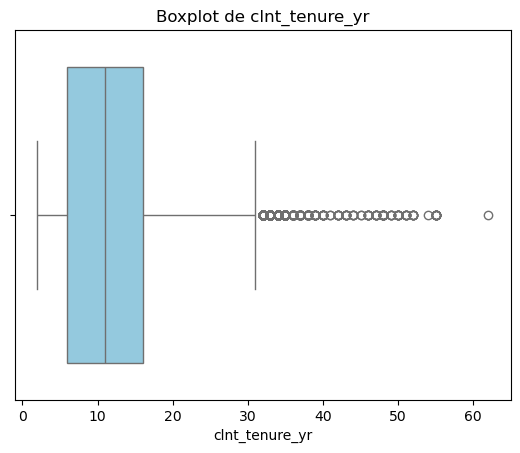

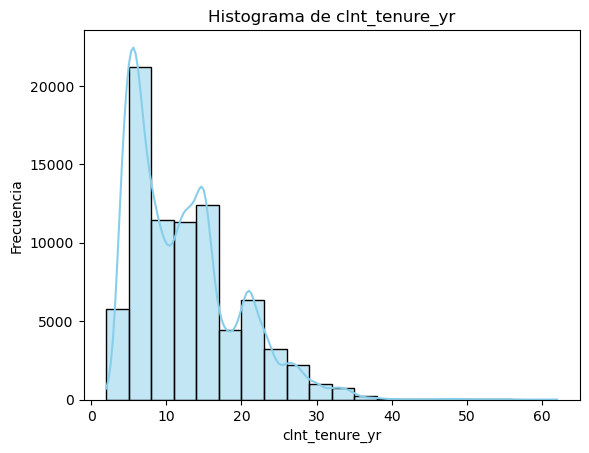

'Se observa la presencia de outliers en los datos, que comparados con la media de los clientes representan a aquellas personas\ncon la mayor cantidad de años como clientes del banco. Esto también se traduce un alto valor de la varianza\nAl ser parte de los clientes, no pueden ser omitidos para el análisis.\n\nPor su parte, el coeficiente de asimetría mayor a cero indica un sesgo positivo que concentra los datos a la derecha, hecho \ncomprobable en el histograma generado\n\nRespecto al coeficiente de curtosis, con un valor 1.07, se considera una curva leptocúrtica por la importante densidad de datos\ncercanos a la media.\n.\n'

In [7]:
#clnt_tenure_yr: how long the client has been with Vanguard (YEARS)
f.basic_stat(df_final_completo,'clnt_tenure_yr',True,20)
'''Se observa la presencia de outliers en los datos, que comparados con la media de los clientes representan a aquellas personas
con la mayor cantidad de años como clientes del banco. Esto también se traduce un alto valor de la varianza
Al ser parte de los clientes, no pueden ser omitidos para el análisis.

Por su parte, el coeficiente de asimetría mayor a cero indica un sesgo positivo que concentra los datos a la derecha, hecho 
comprobable en el histograma generado

Respecto al coeficiente de curtosis, con un valor 1.07, se considera una curva leptocúrtica por la importante densidad de datos
cercanos a la media.
.
'''

ANÁLISIS DE VARIABLE: clnt_tenure_mnth 

media: 153.36947416825126 
 mediana: 140.0 
 moda: 58.0
 varianza: 7040.983282822355
 desviación estándar: 83.91056717018635
 rango:716.0
 rango intercuartil: 112.0 
 Asimetría: 1.02101473473203 
 Curtosis: 0.9796100981497236


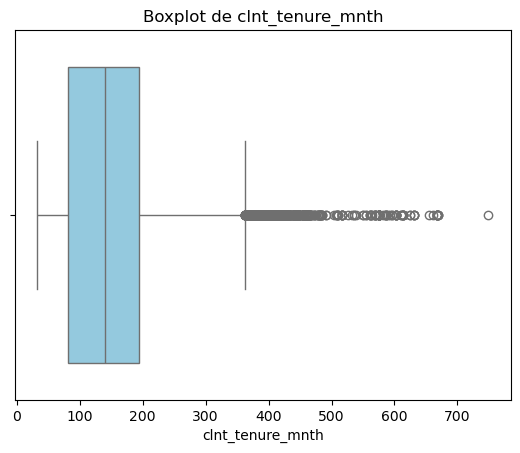

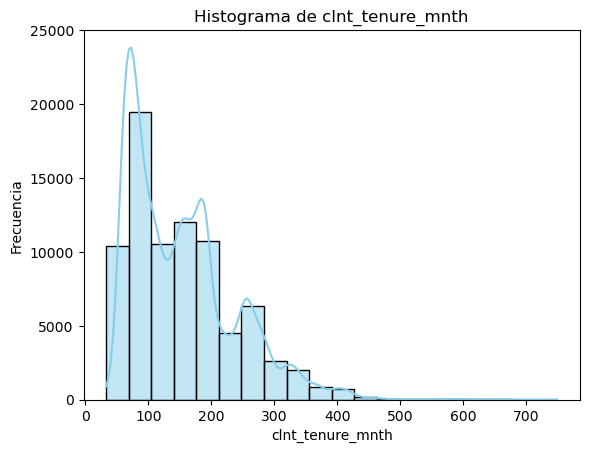

'En este caso, los resultados son análogos a la variable clnt_tenure_yr'

In [8]:
#clnt_tenure_mnth: how long the client has been with Vanguard (MONTHS)
f.basic_stat(df_final_completo,'clnt_tenure_mnth',True,20)
'''En este caso, los resultados son análogos a la variable clnt_tenure_yr'''

ANÁLISIS DE VARIABLE: clnt_age 

media: 47.51163296503896 
 mediana: 48.5 
 moda: 58.5
 varianza: 248.55600436918456
 desviación estándar: 15.765659021087084
 rango:82.5
 rango intercuartil: 26.5 
 Asimetría: 0.016659311656937494 
 Curtosis: -0.9207722941865852


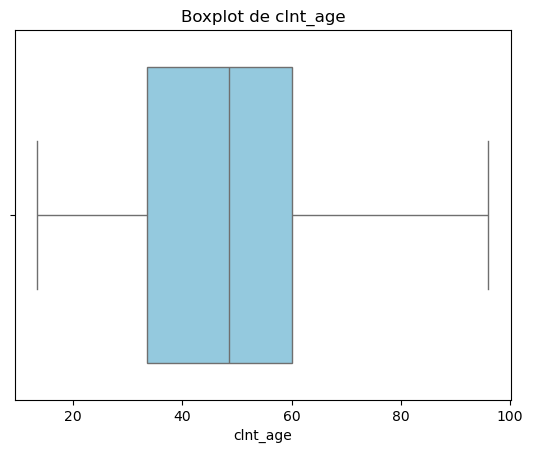

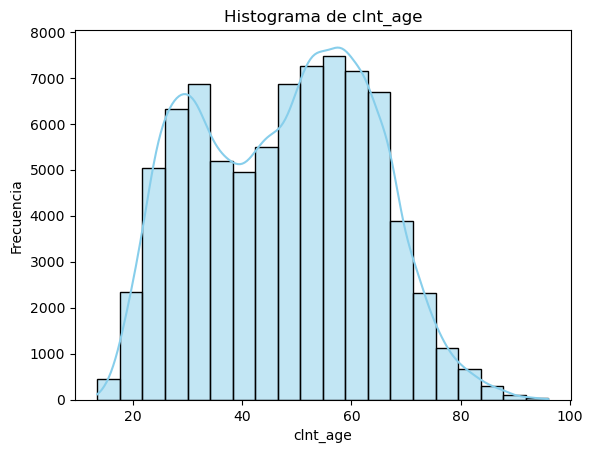

'La edad de los clientes tiene dos grandes concentraciones, una alrededor de los 30, y una más a los 50, siendo mayor \nesta última. En este caso, no existen valores atípicos, considerando la naturaleza de la variable.\nCon una asimetría a penas arriba del 0, se señala una ligera asimetría positiva (izquierda). Además, la curtosis negativa es\notro indicativo de cómo los datos se reparten el los rangos de edad (curva platicúrtica).\n'

In [9]:
#clnt_age: the age of the client.
f.basic_stat(df_final_completo,'clnt_age',True,20)
'''La edad de los clientes tiene dos grandes concentraciones, una alrededor de los 30, y una más a los 50, siendo mayor 
esta última. En este caso, no existen valores atípicos, considerando la naturaleza de la variable.
Con una asimetría a penas arriba del 0, se señala una ligera asimetría positiva (izquierda). Además, la curtosis negativa es
otro indicativo de cómo los datos se reparten el los rangos de edad (curva platicúrtica).
'''

ANÁLISIS DE VARIABLE: bal 

media: 159222.71357344367 
 mediana: 66733.56 
 moda: 53955.97
 varianza: 112460020314.03758
 desviación estándar: 335350.5931320796
 rango:16306250.73
 rango intercuartil: 110812.54999999999 
 Asimetría: 13.639398510669933 
 Curtosis: 432.3518460548498


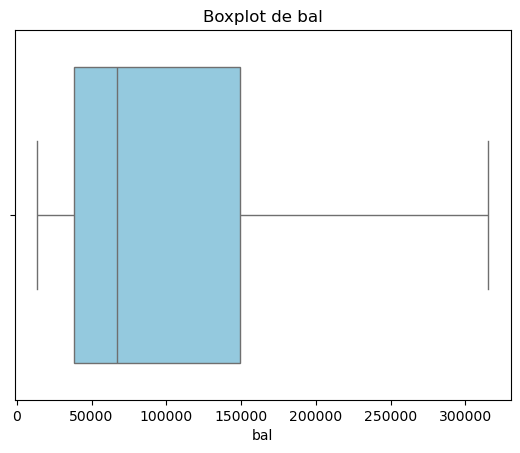

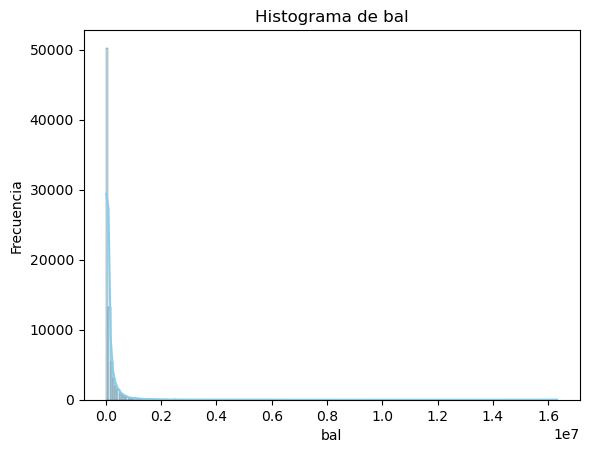

'\nObservando el rango y la desviación estándar, se observa la importante presencia de valores atípicos, correspondiente a aquellos\nbalances con sumas superiores a las 300k unidades monetarias. En este caso una asimetría positiva refleja la concentración de datos\na la izquierda, cercanos a la media. Si se requiere profundizar, se recomienda analizar por separado estos valores atípicos. \n'

In [10]:
#bal: total balance spread across all accounts for a particular client
f.basic_stat(df_final_completo,'bal',False,200)
'''
Observando el rango y la desviación estándar, se observa la importante presencia de valores atípicos, correspondiente a aquellos
balances con sumas superiores a las 300k unidades monetarias. En este caso una asimetría positiva refleja la concentración de datos
a la izquierda, cercanos a la media. Si se requiere profundizar, se recomienda analizar por separado estos valores atípicos. 
'''

ANÁLISIS DE VARIABLE: calls_6_mnth 

media: 3.534991238208866 
 mediana: 3.0 
 moda: 6.0
 varianza: 5.0399596352119955
 desviación estándar: 2.2449854420935553
 rango:7.0
 rango intercuartil: 4.0 
 Asimetría: -0.044686019317071723 
 Curtosis: -1.3385463086281149


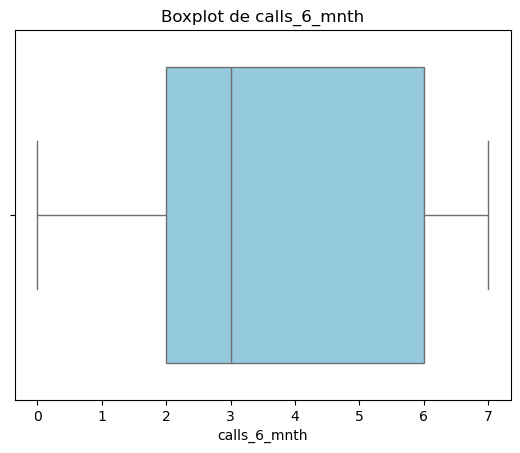

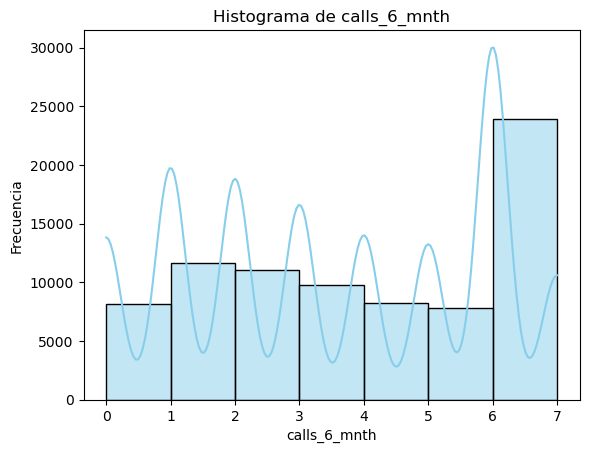

'\nDe esta variable tampoco se observan valores atípicos. Se aprecia que es común el servicio telefónico entre los clientes, con\nal menos una llamada cada dos meses. \n'

In [11]:
#calls_6_mnth: cantidad de veces que el cliente se comunicó mediante una llamada en los últimos seis meses.
f.basic_stat(df_final_completo,'calls_6_mnth',True,7)
'''
De esta variable tampoco se observan valores atípicos. Se aprecia que es común el servicio telefónico entre los clientes, con
al menos una llamada cada dos meses. 
'''

ANÁLISIS DE VARIABLE: logons_6_mnth 

media: 5.717137069211936 
 mediana: 6.0 
 moda: 9.0
 varianza: 5.570157834695725
 desviación estándar: 2.360118182357766
 rango:8.0
 rango intercuartil: 4.0 
 Asimetría: -0.11072726295552654 
 Curtosis: -1.073091589459068


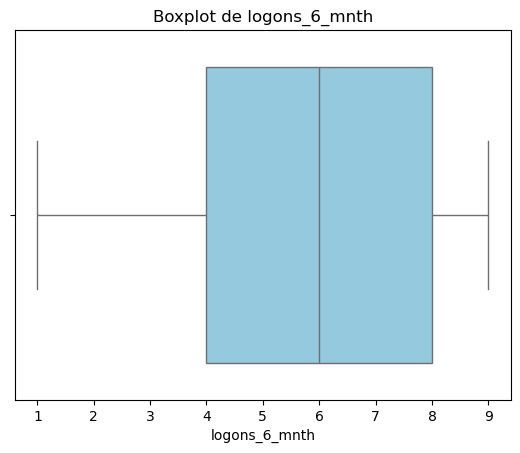

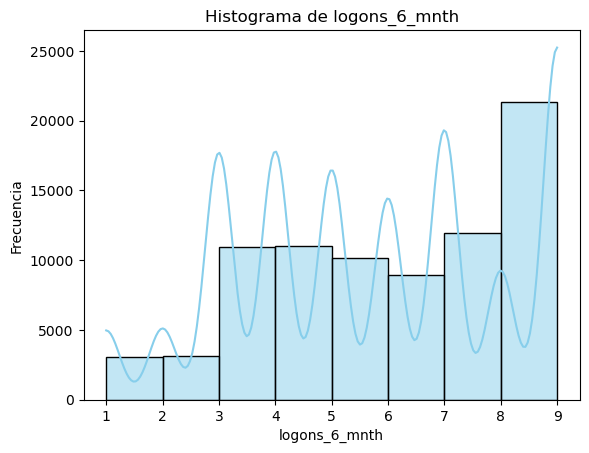

'\nEn esta variable no se observan valores atípicos. Con la moda en 9, los datos se hallan distribuidos en una curva \nplaticúrtica, como lo indica la curtosis negativa, y con una asimetría negativa (derecha). \n'

In [12]:
#logons_6_mnth: cantidad de veces que el cliente se comunicó mediante una llamada en los últimos seis meses.
f.basic_stat(df_final_completo,'logons_6_mnth',True,8)
'''
En esta variable no se observan valores atípicos. Con la moda en 9, los datos se hallan distribuidos en una curva 
platicúrtica, como lo indica la curtosis negativa, y con una asimetría negativa (derecha). 
'''

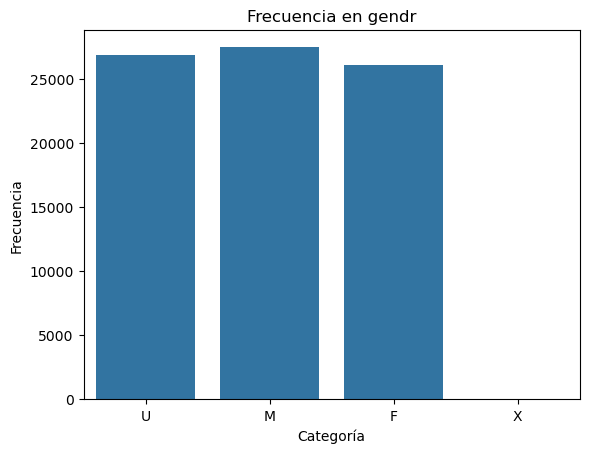

'\nSe observa que más de un tercio de los datos no tienen un género definido. \n'

In [13]:
f.categ_basic_stat(df_final_completo,'gendr')
'''
Se observa que más de un tercio de los datos no tienen un género definido. 
'''

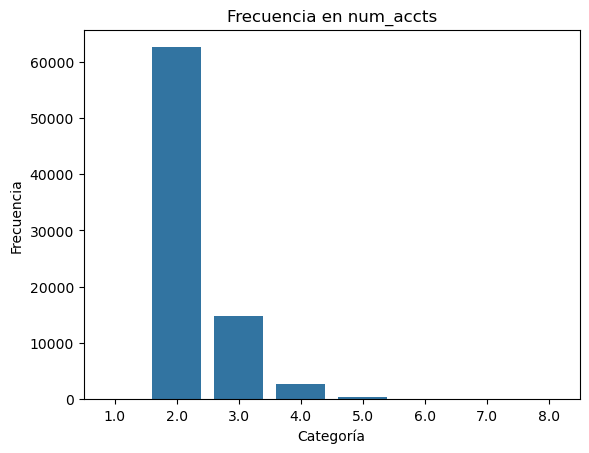

'\nSe observa cómo los clientes tienen 2 cuentas al menos, y una porción menos común con entre 5 y 8 cuentas.'

In [14]:
f.categ_basic_stat(df_final_completo,'num_accts')
'''
Se observa cómo los clientes tienen 2 cuentas al menos, y una porción menos común con entre 5 y 8 cuentas.'''

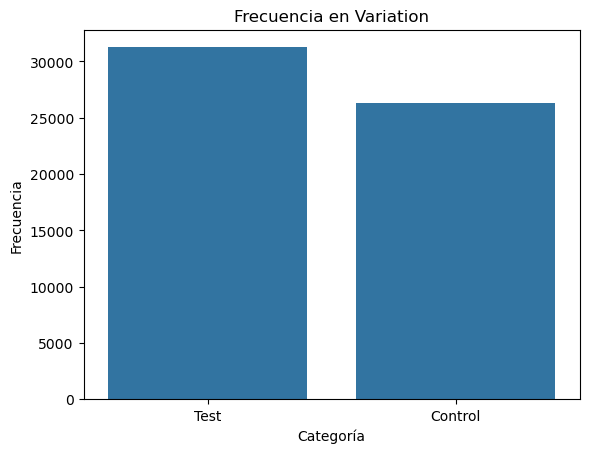

Variation  count
0      Test  31256
1   Control  26260

In [15]:
f.categ_basic_stat(df_final_completo,'Variation') #Inspección de los clientes que realizaron el test

## Análisis de la aplicación del test
#### Para realizar el análisis de cómo se aplicó la prueba para el sitio web, se analiza la muestra seleccionada.

In [16]:
#Selecciona dentro del dataframe principal los clientres no registados en el test
df_final_completo.loc[df_final_completo["Variation"].isna()].sample(10)

#De todos estos registros no se podrán sacar conclusiones, dado que no se conoce en cuál de los dos
#sitios web han realizado su navegación. 

visit_id  confirm_count  start_count  step_1_count  \
76442  955881609_16788184028_231934              0            1             1   
42771  580295495_10188679077_286301              0            1             1   
39166  540394760_90375955473_680201              0            2             2   
35653  500142887_44184301405_235569              1            1             1   
27986  415428566_20687322420_360944              0            1             1   
74331  931828694_43835735292_573135              0            1             0   
68694   86911598_19507788257_489614              0            3             2   
41818  569730708_69071049393_212500              0            1             1   
75857  949226443_45081674136_747800              0            2             2   
38714  535056326_35722302174_384750              0            1             1   

       step_2_count  step_3_count  confirm_time  start_time  step_1_time  \
76442             2             2           0.0    5.000000         13.0   
42771             0             0           0.0    3.000000          7.0   
39166             1             1           0.0   73.500000         30.0   
35653             1             1          14.0    8.000000         10.0   
27986             2             1           0.0   14.000000         23.0   
74331             0             0           0.0   10.000000          0.0   
68694             2             1           0.0   24.666667         26.0   
41818             1             1           0.0   15.000000        368.0   
75857             0             0           0.0    7.000000        123.5   
38714             2             2           0.0   19.000000          9.0   

       step_2_time  ...             visitor_id  clnt_tenure_yr  \
76442         34.0  ...  261938238_87419633671            24.0   
42771          0.0  ...  304421020_86844630490            21.0   
39166         84.0  ...  748883028_91191289170             6.0   
35653        107.0  ...  164384225_56601143171            11.0   
27986         33.5  ...  664618980_73057690222            22.0   
74331          0.0  ...  807234517_98031763483             4.0   
68694         21.0  ...  695605149_99499421219             6.0   
41818        158.0  ...  988892811_18860168792            21.0   
75857          0.0  ...  788700539_25449934229             9.0   
38714         24.0  ...   696352536_1457111542            15.0   

      clnt_tenure_mnth  clnt_age  gendr  num_accts        bal  calls_6_mnth  \
76442            295.0      59.0      M        2.0  218412.79           3.0   
42771            253.0      54.0      M        2.0   19082.21           6.0   
39166             80.0      24.0      U        2.0   24999.55           4.0   
35653            140.0      43.5      F        2.0   24196.08           5.0   
27986            265.0      69.5      M        2.0  238369.73           4.0   
74331             52.0      63.0      M        2.0  322597.03           3.0   
68694             75.0      60.0      M        2.0  411472.01           7.0   
41818            255.0      57.5      M        2.0  147356.36           6.0   
75857            111.0      43.0      U        2.0  102307.12           2.0   
38714            189.0      61.5      M        2.0   40773.19           4.0   

       logons_6_mnth  Variation  
76442            3.0        NaN  
42771            6.0        NaN  
39166            4.0        NaN  
35653            5.0        NaN  
27986            4.0        NaN  
74331            3.0        NaN  
68694            7.0        NaN  
41818            6.0        NaN  
75857            2.0        NaN  
38714            4.0        NaN  

[10 rows x 22 columns]

### Muestra para TEST y CONTROL


In [17]:
df_test=pd.read_csv("Data/cleaned/test.csv")
df_control=pd.read_csv("Data/cleaned/control.csv")

#### División de variables numéricas y variables categóricas

In [18]:
df_test_num = df_test[['confirm_count', 'start_count', 'step_1_count', 'confirm_time', 'start_time', 
                       'step_1_time', 'step_2_time', 'step_3_time', 'step_2_count', 'step_3_count', 
                        'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 
                       'bal', 'calls_6_mnth', 'logons_6_mnth']]

# Selección de columnas categóricas
df_test_categ = df_test[['visit_id', 'client_id', 'visitor_id', 'gendr']]

In [19]:
df_control_num = df_control[['confirm_count', 'start_count', 'step_1_count', 'confirm_time', 'start_time', 
                       'step_1_time', 'step_2_time', 'step_3_time', 'step_2_count', 'step_3_count', 
                       'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 
                       'bal', 'calls_6_mnth', 'logons_6_mnth']]

# Selección de columnas categóricas
df_control_categ = df_control[['visit_id', 'client_id', 'visitor_id', 'gendr']]

#### Comparación de los datos generales de los clientes: Muestra general / Test / Control 

En este apartado se pueden observar las comparaciones entre los valores de las variables que caracterizan a los clientes, como su edad, antigüedad en el banco, número de cuentas, balance, entre otras.

El objetivo es demostrar que las muestras elegidas para realizar las pruebas con el sitio web nuevo y el sitio web previo, son verdaderamente representativas. Para ello, se calculan las estadísticas básicas para las variables en las muestras general (azul), muestra en sitio web nuevo (verde), y muestra en sitio web previo (rosa).

ANÁLISIS DE VARIABLE: clnt_tenure_yr
  DataFrame 1 - media: 12.280190895194064 | mediana: 11.0 | moda: 6.0 | varianza: 49.291542545175886 | desviación estándar: 7.020793583718003 | rango: 60.0 | rango intercuartil: 10.0 | Asimetría: 1.006985920449685 | Curtosis: 0.9480928834367615
  DataFrame 2 - media: 12.190779370360891 | mediana: 11.0 | moda: 5.0 | varianza: 48.31429795598784 | desviación estándar: 6.950848721989844 | rango: 53.0 | rango intercuartil: 10.0 | Asimetría: 1.0087538655652104 | Curtosis: 0.9239753768471304
  DataFrame 3 - media: 12.292993145468394 | mediana: 11.0 | moda: 6.0 | varianza: 49.232328372700515 | desviación estándar: 7.016575259533708 | rango: 53.0 | rango intercuartil: 10.0 | Asimetría: 0.9827212275030895 | Curtosis: 0.8028685535566926


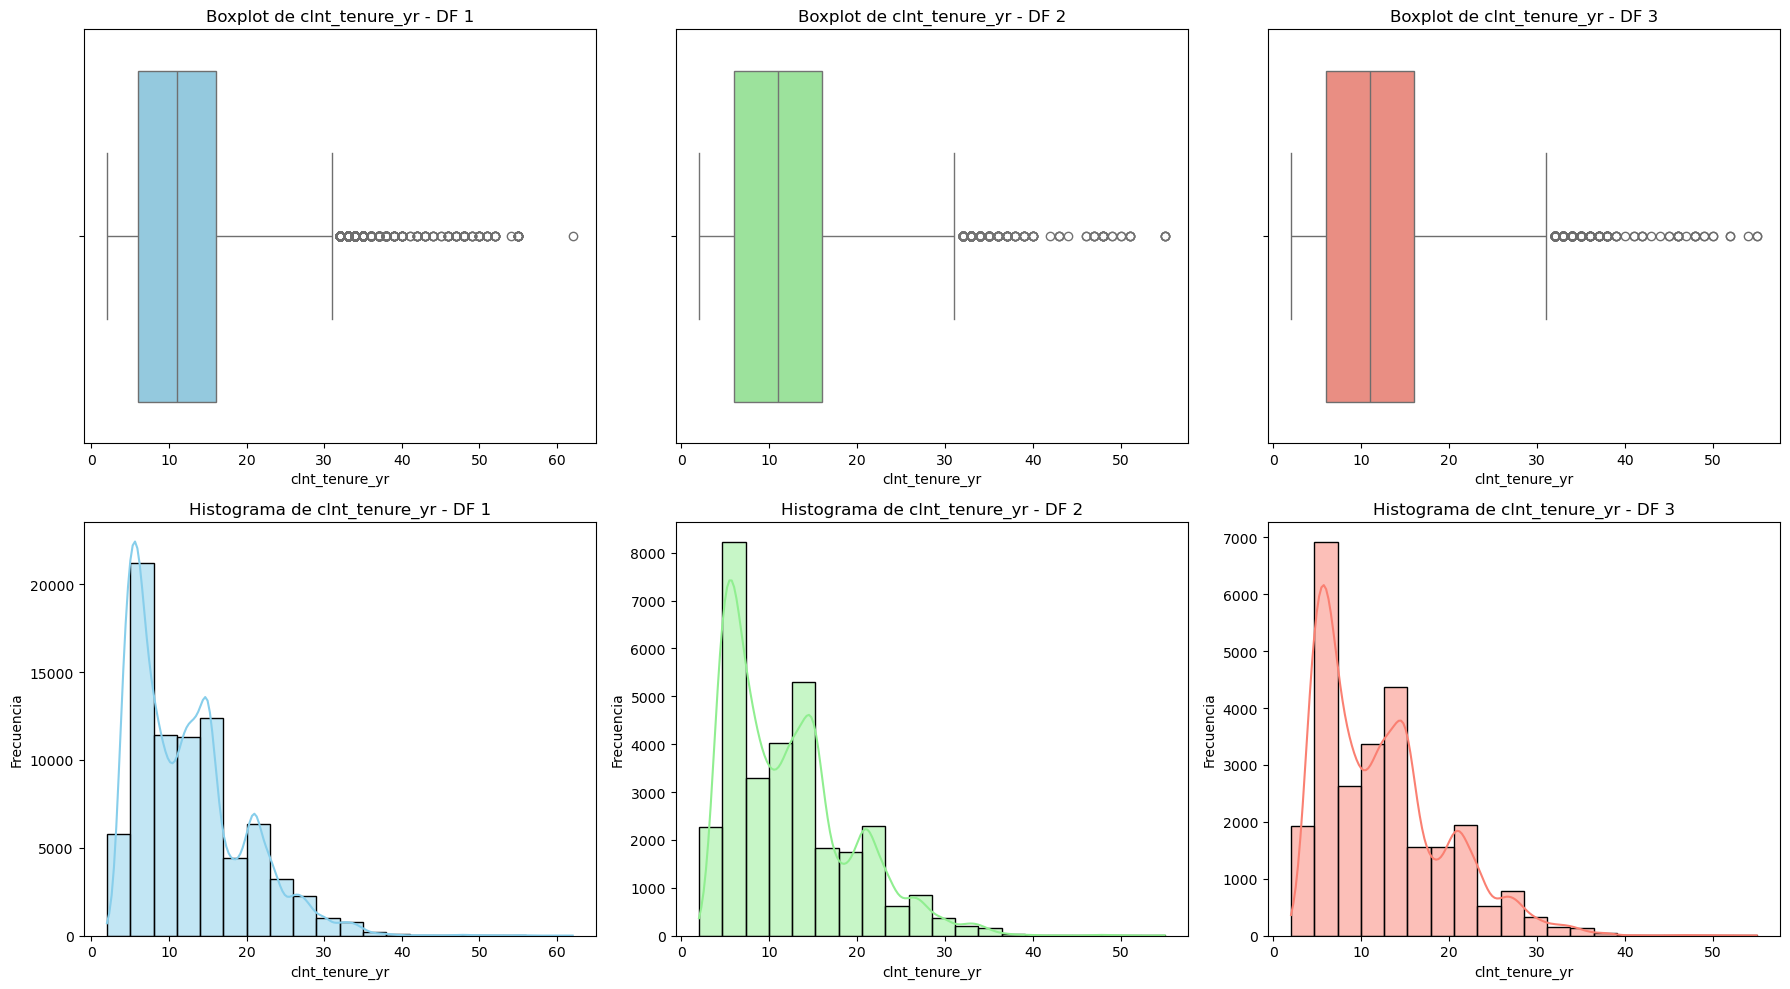

In [20]:
f.basic_stat_comparison([df_final_completo, df_test_num, df_control_num],'clnt_tenure_yr', show_outliers=True, bins=20)

ANÁLISIS DE VARIABLE: clnt_age
  DataFrame 1 - media: 47.51163296503896 | mediana: 48.5 | moda: 58.5 | varianza: 248.55600436918456 | desviación estándar: 15.765659021087084 | rango: 82.5 | rango intercuartil: 26.5 | Asimetría: 0.016659311656937494 | Curtosis: -0.9207722941865852
  DataFrame 2 - media: 48.35548374712055 | mediana: 49.5 | moda: 62.5 | varianza: 245.18997664647438 | desviación estándar: 15.658543247903822 | rango: 79.0 | rango intercuartil: 26.0 | Asimetría: 0.013460748411444139 | Curtosis: -0.9384462419098898
  DataFrame 3 - media: 48.456698910808136 | mediana: 50.0 | moda: 58.5 | varianza: 246.9278770103811 | desviación estándar: 15.713938940010589 | rango: 79.0 | rango intercuartil: 26.5 | Asimetría: 0.013195043683421512 | Curtosis: -0.9335830154500062


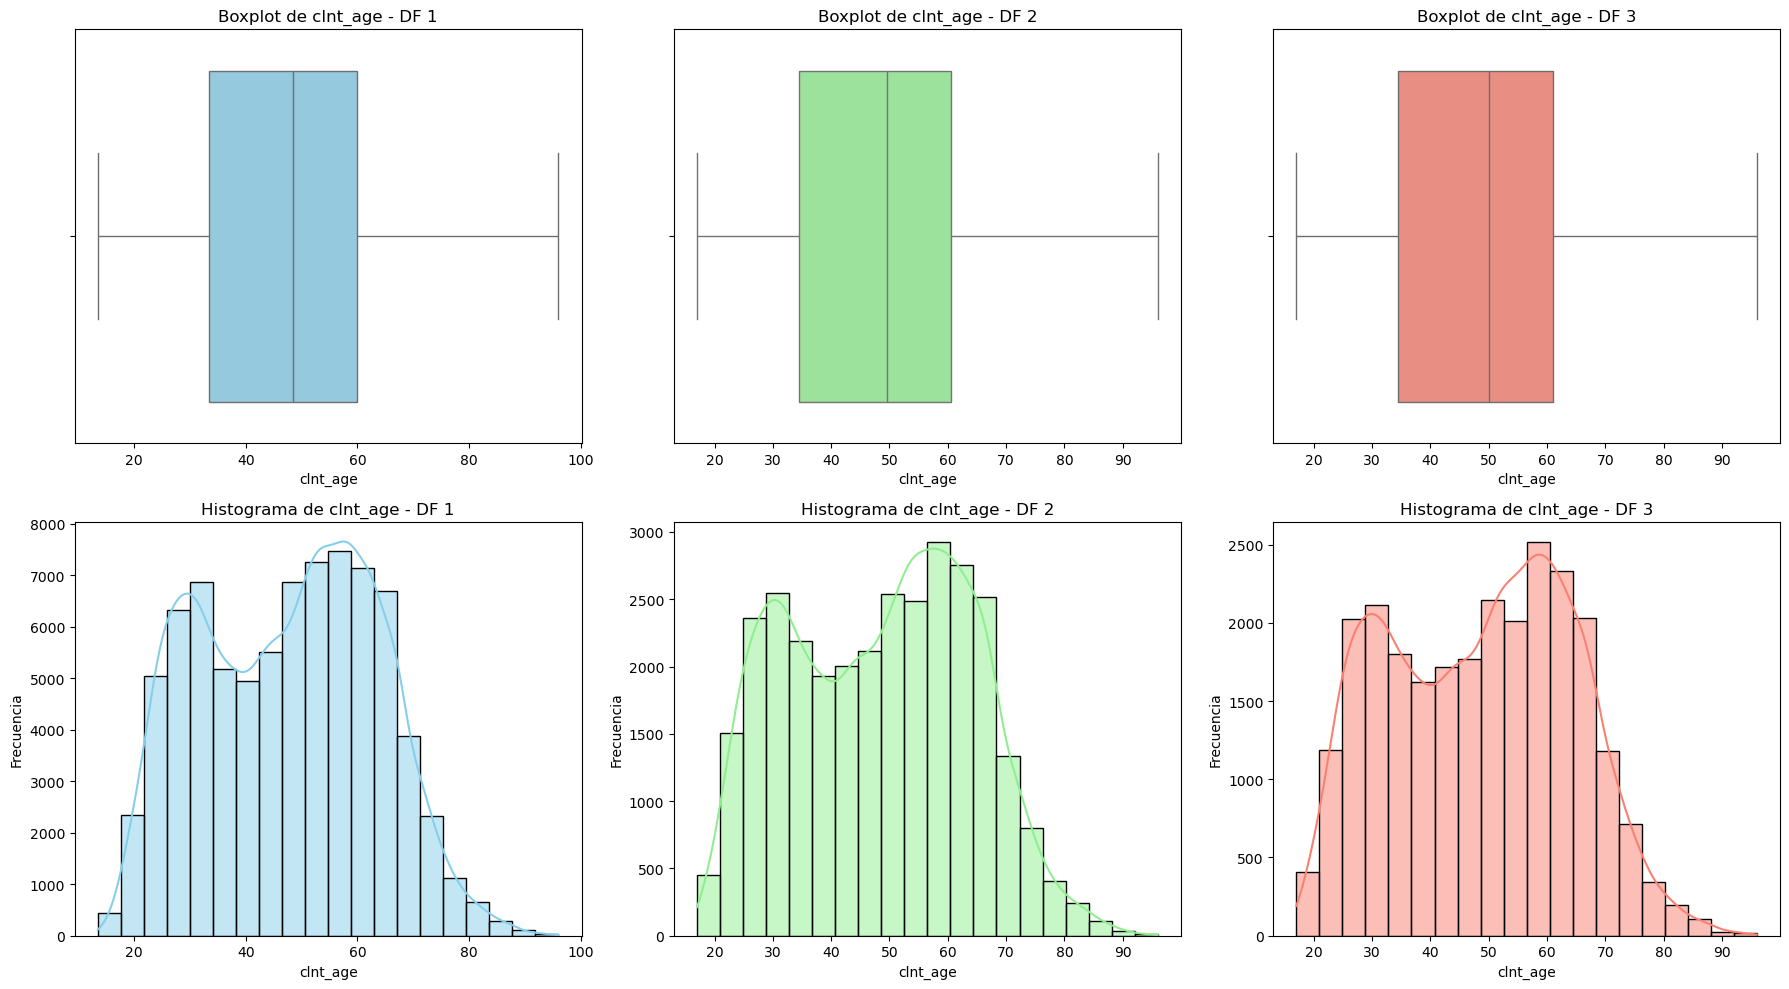

In [21]:
f.basic_stat_comparison([df_final_completo, df_test_num, df_control_num],'clnt_age', show_outliers=True, bins=20)

ANÁLISIS DE VARIABLE: bal
  DataFrame 1 - media: 159222.71357344367 | mediana: 66733.56 | moda: 53955.97 | varianza: 112460020314.03758 | desviación estándar: 335350.5931320796 | rango: 16306250.73 | rango intercuartil: 110812.54999999999 | Asimetría: 13.639398510669933 | Curtosis: 432.3518460548498
  DataFrame 2 - media: 161091.27519452263 | mediana: 68662.98 | moda: 126442.72 | varianza: 133430516287.85432 | desviación estándar: 365281.4206715889 | rango: 16296250.71 | rango intercuartil: 110216.3125 | Asimetría: 18.596079682067344 | Curtosis: 668.553455347508
  DataFrame 3 - media: 162085.07740365574 | mediana: 69619.565 | moda: 53955.97 | varianza: 97076674976.32393 | desviación estándar: 311571.2999881792 | rango: 7718204.399999999 | rango intercuartil: 111133.85500000001 | Asimetría: 7.840358397114166 | Curtosis: 101.28125252476754


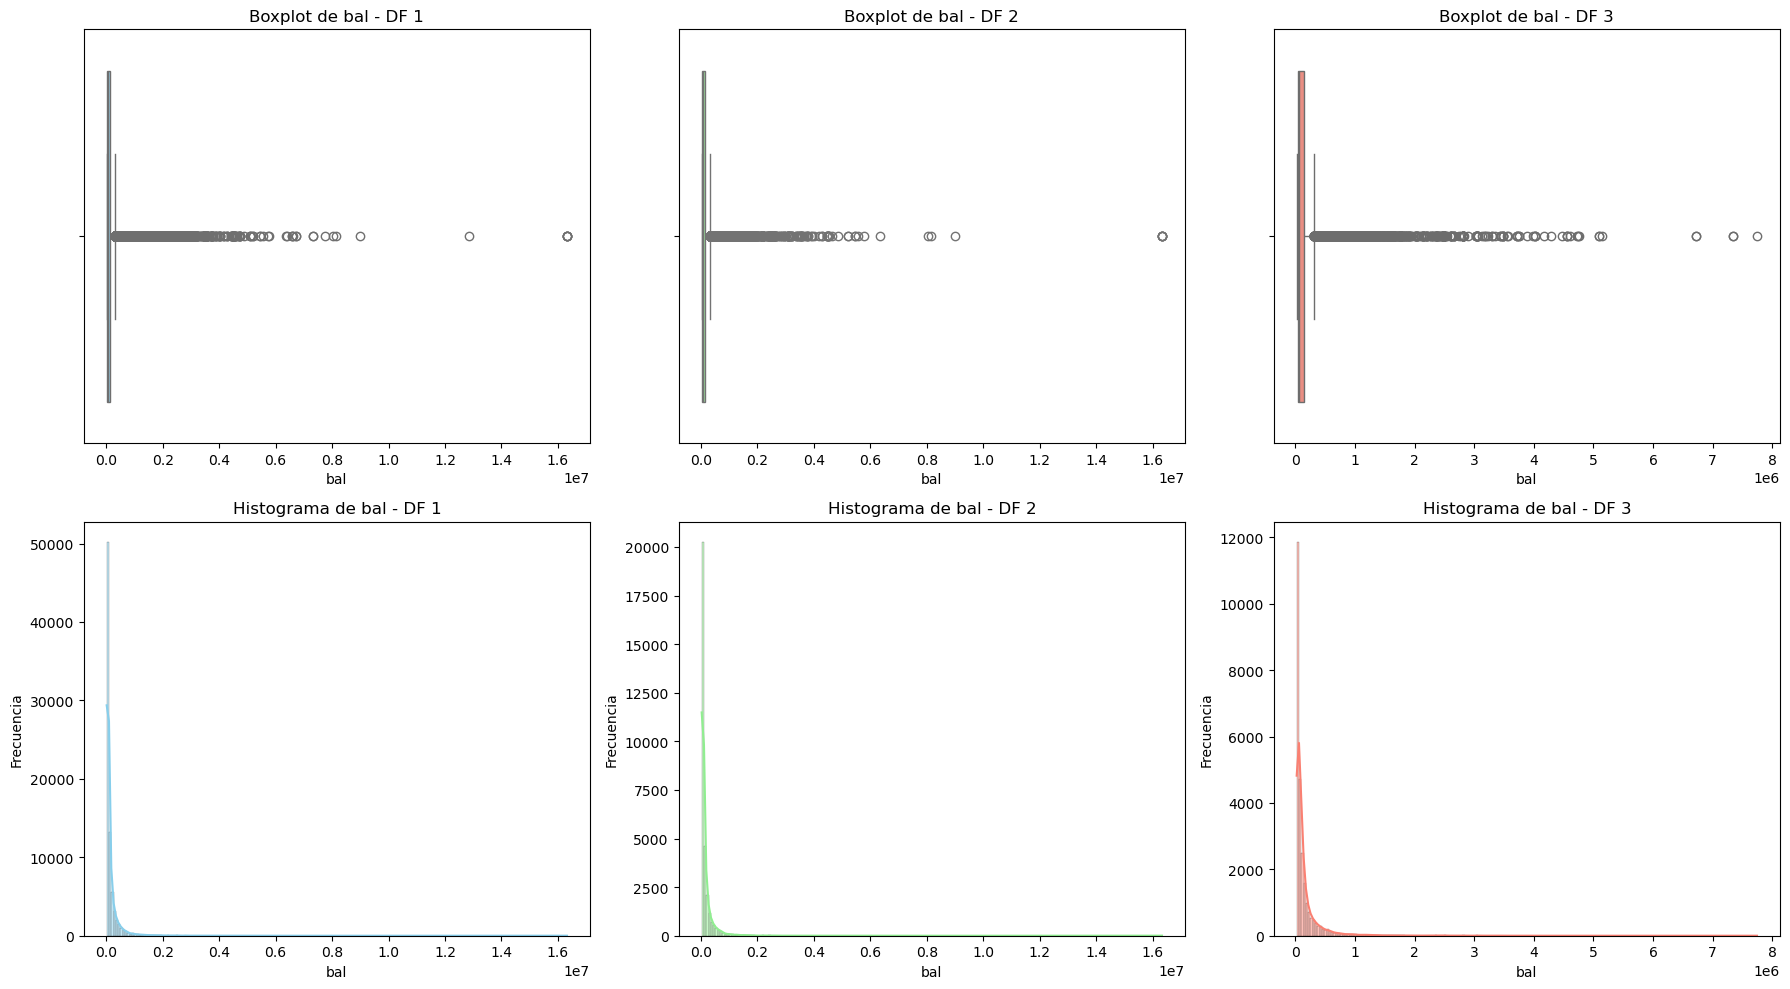

In [22]:
f.basic_stat_comparison([df_final_completo, df_test_num, df_control_num],'bal', show_outliers=True, bins=200)

ANÁLISIS DE VARIABLE: calls_6_mnth
  DataFrame 1 - media: 3.534991238208866 | mediana: 3.0 | moda: 6.0 | varianza: 5.0399596352119955 | desviación estándar: 2.2449854420935553 | rango: 7.0 | rango intercuartil: 4.0 | Asimetría: -0.044686019317071723 | Curtosis: -1.3385463086281149
  DataFrame 2 - media: 3.2051126183772713 | mediana: 3.0 | moda: 6.0 | varianza: 4.861750855979258 | desviación estándar: 2.2049378349466586 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.027388123421668742 | Curtosis: -1.457850174495789
  DataFrame 3 - media: 3.292003046458492 | mediana: 3.0 | moda: 6.0 | varianza: 4.791839774543743 | desviación estándar: 2.1890271296956882 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.08204539638055772 | Curtosis: -1.4464025071341764


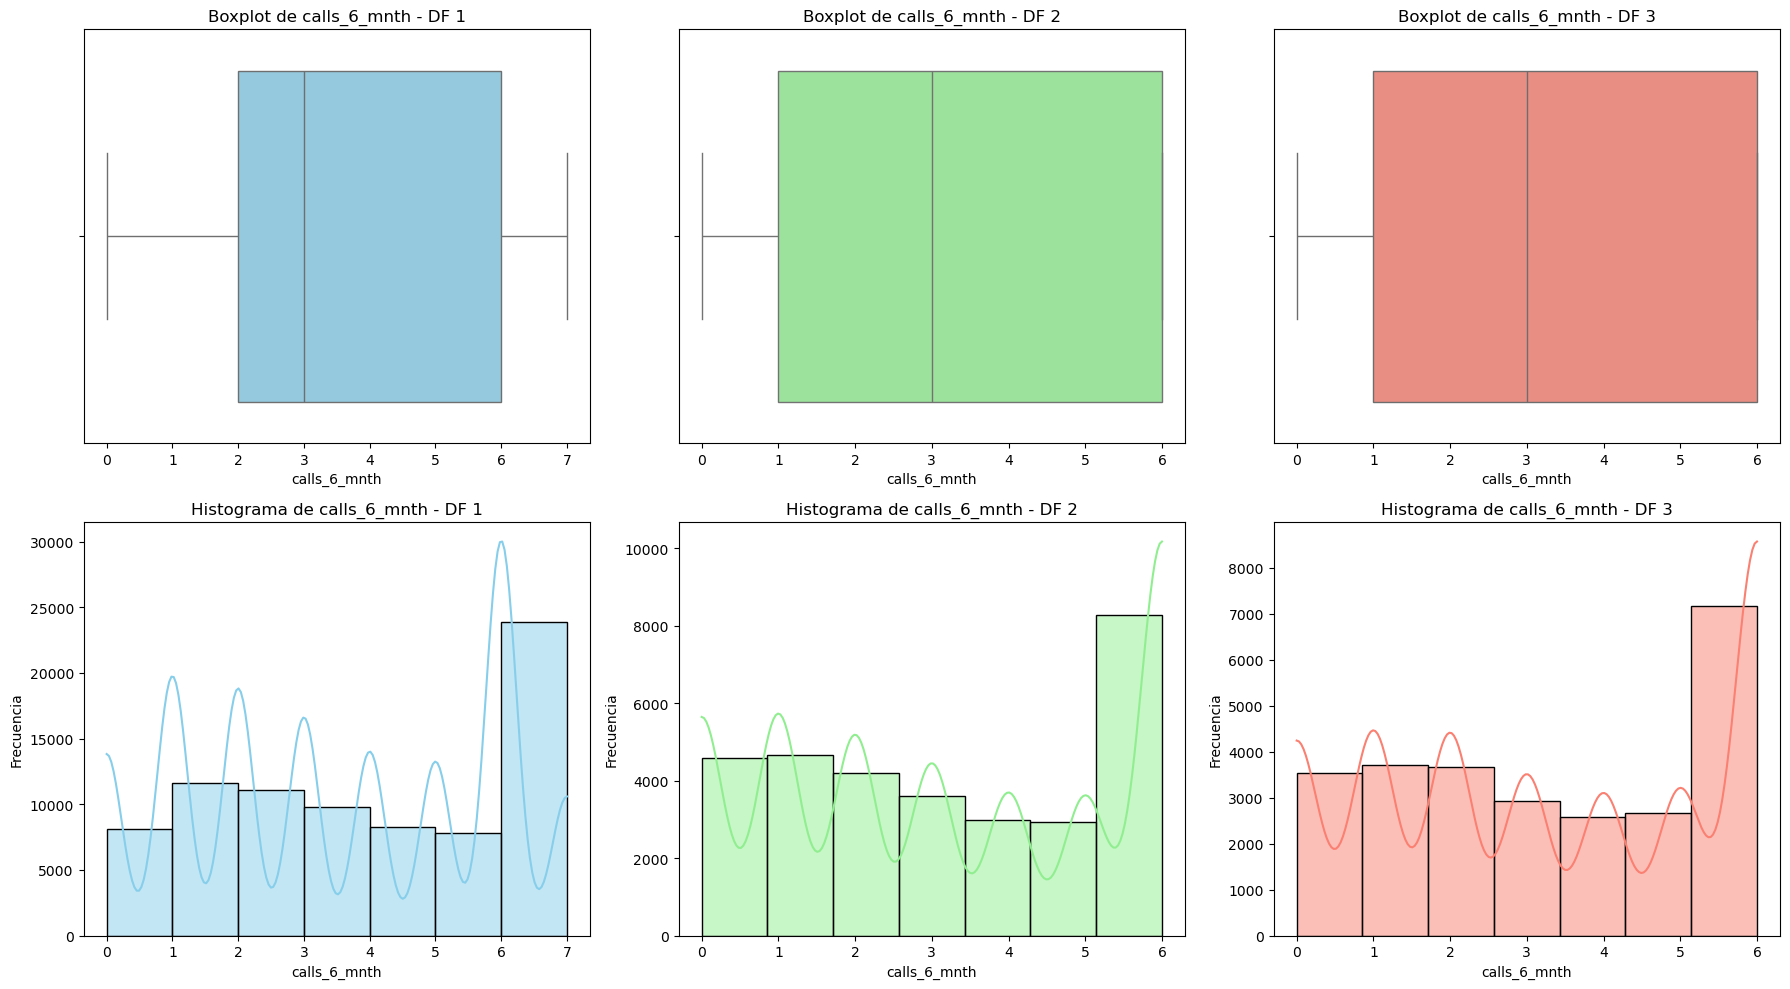

In [23]:
f.basic_stat_comparison([df_final_completo, df_test_num, df_control_num],'calls_6_mnth', show_outliers=True, bins=7)

ANÁLISIS DE VARIABLE: logons_6_mnth
  DataFrame 1 - media: 5.717137069211936 | mediana: 6.0 | moda: 9.0 | varianza: 5.570157834695725 | desviación estándar: 2.360118182357766 | rango: 8.0 | rango intercuartil: 4.0 | Asimetría: -0.11072726295552654 | Curtosis: -1.073091589459068
  DataFrame 2 - media: 6.244305093422063 | mediana: 6.0 | moda: 9.0 | varianza: 4.800015559323411 | desviación estándar: 2.1908937809312916 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.04828902286604906 | Curtosis: -1.447888856656005
  DataFrame 3 - media: 6.328332063975628 | mediana: 6.0 | moda: 9.0 | varianza: 4.736095089090292 | desviación estándar: 2.176257128441006 | rango: 6.0 | rango intercuartil: 5.0 | Asimetría: -0.10159499068066119 | Curtosis: -1.4341723687446994


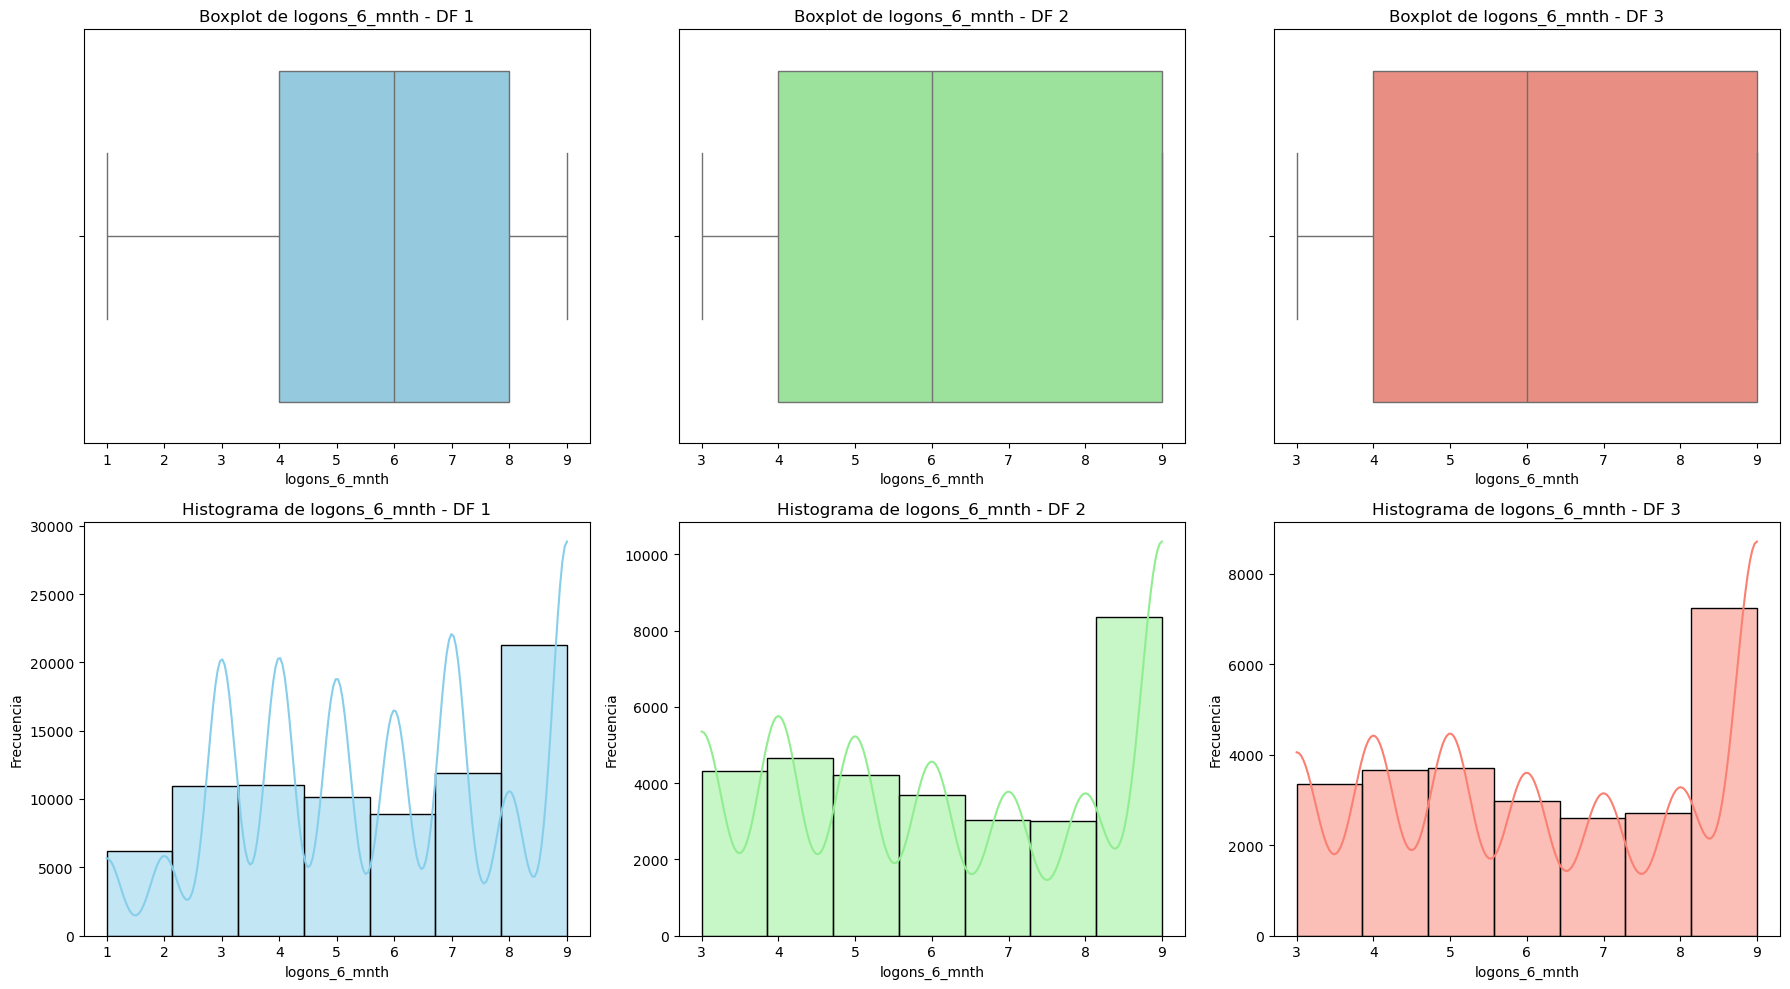

In [24]:
f.basic_stat_comparison([df_final_completo, df_test_num, df_control_num],'logons_6_mnth', show_outliers=True, bins=7)

FRECUENCIAS DE LA COLUMNA 'gendr' EN EL DataFrame 1:
gendr
M    27464
U    26882
F    26113
X        4
Name: count, dtype: int64

FRECUENCIAS DE LA COLUMNA 'gendr' EN EL DataFrame 2:
gendr
M    10523
U    10472
F    10259
X        2
Name: count, dtype: int64

FRECUENCIAS DE LA COLUMNA 'gendr' EN EL DataFrame 3:
gendr
M    9059
U    8798
F    8403
Name: count, dtype: int64



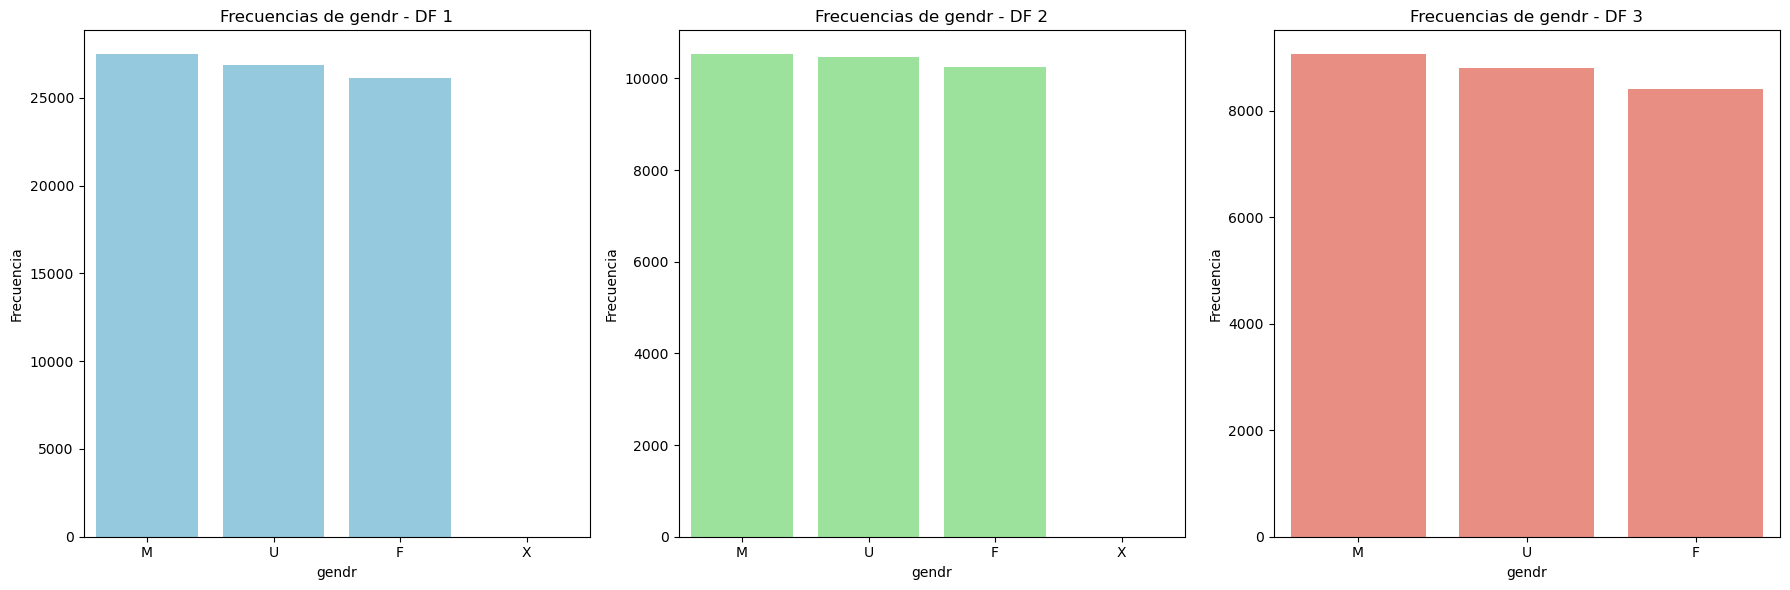

In [25]:
f.categorical_stat_comparison([df_final_completo, df_test_categ, df_control_categ],'gendr')

### De manera general, se puede observar que las muestras de clientes en donde se aplicaron las pruebas para los sitios web, presentan leves variaciones con respecto a las características de la muestra principal.
Por ejemplo, la media de la edad en la muestra_test y la muestra_control, aumentan 4.11% y 4.34% respectivamente, en contraste con la muestra general. Minetras tanto, la desviación estándar se mantiene en valores de 15.6 y 15.7 años.

La variable con cambios más significativos entre las muestras es el balance. 

El balance tiene una variación entre las muestras, debida a la baja cantidad de clientes con sumas superiores a los 5 millones de unidades monetarias. Una opción para conocer mejor el comportamiento de este sector de los clientes, es realizar estudios por grupos de clientes, donde el estrato con mayor balance, podría delimitarse a patir del millón de unidades monetarias, alcanzando así una muestra de 1574 clientes. 

Por otro lado, el 34.17% de la muestra general tiene un género desconocido, característica heredada a las muestras test y control, hecho que reduce la población muestral cuando se analiza esta característica.

### En resumen, se considera que las muestras seleccionadas para ejecutar las pruebas en los sitios web sí son representativas de la muestra general. Esto se valida más adelante mediante pruebas de hipótesis.

## Análisis multivariable

En este apartado se analizan las posibles correlaciones entre las variables numéricas, para cada una de las muestras ensayadas en el nuevo y el antiguo sitio web.

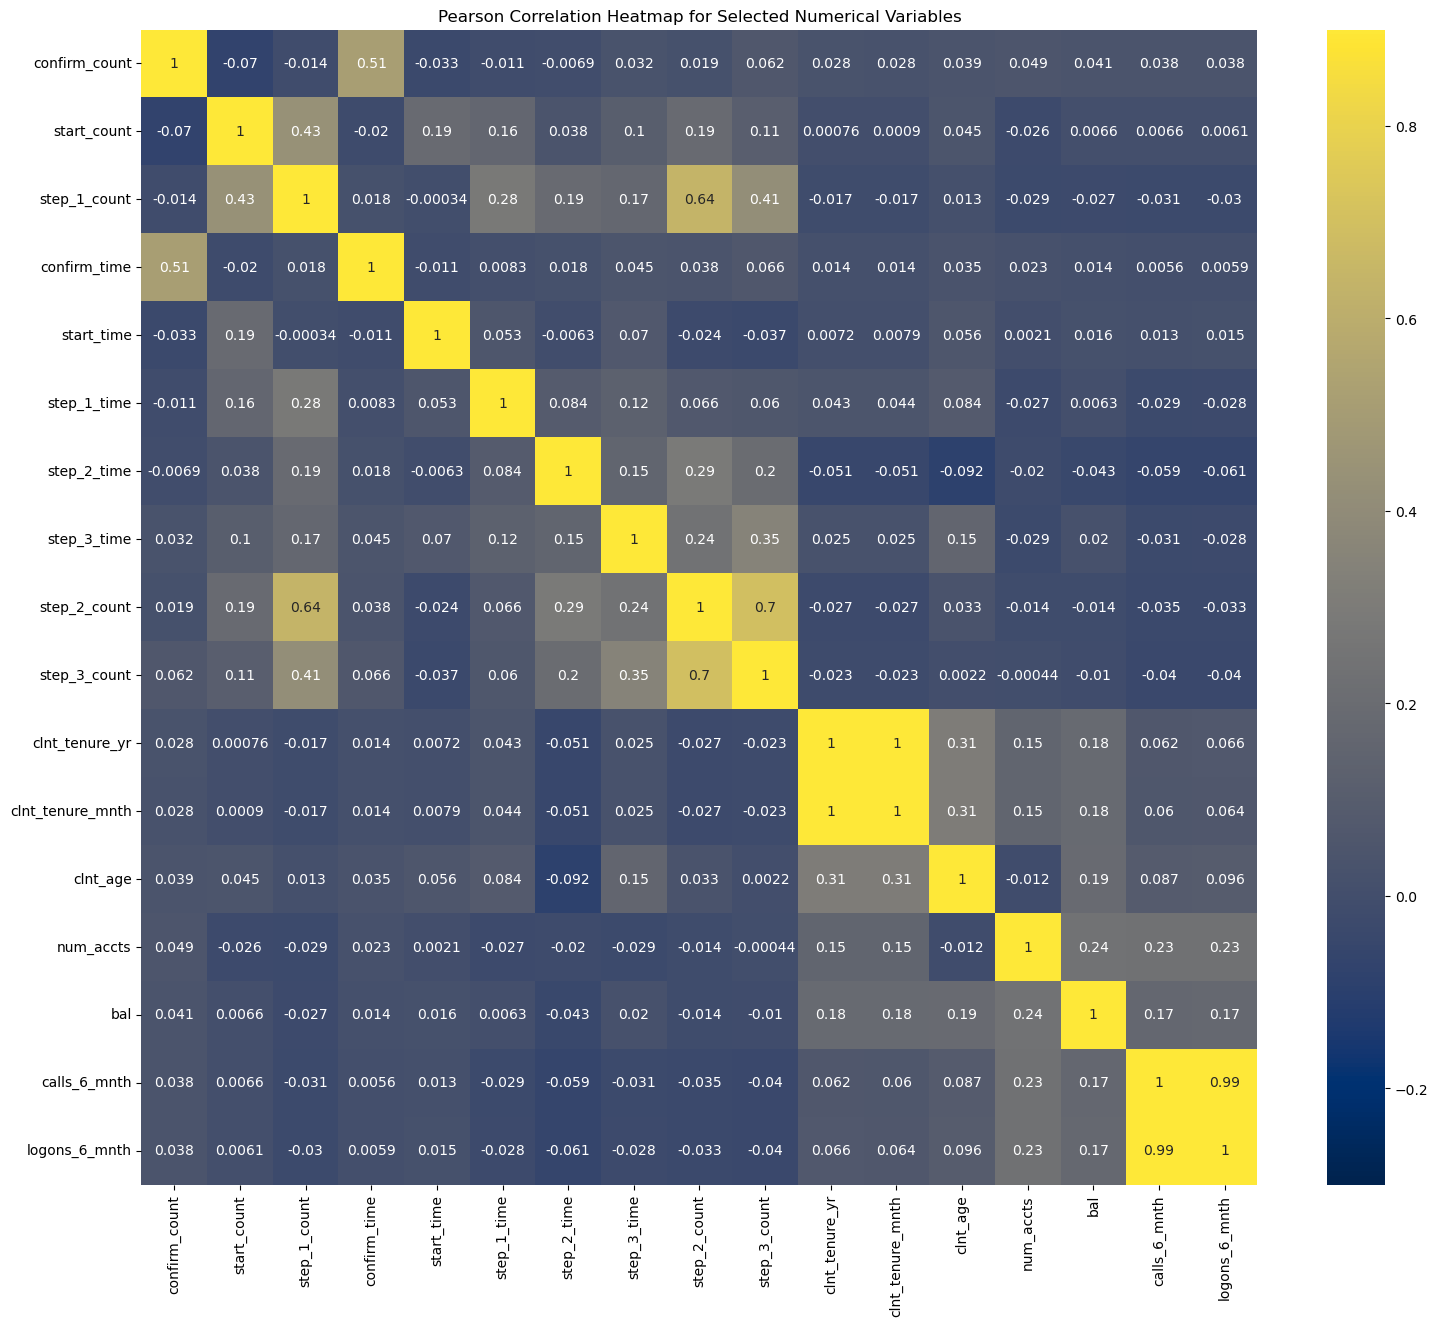

In [26]:
#MAPA DE CORRELACIÓN LINEAL ENTRE VARIABLES DE MUESTRA TEST
f.corr_map_pearson(df_test_num,-0.3,0.9)

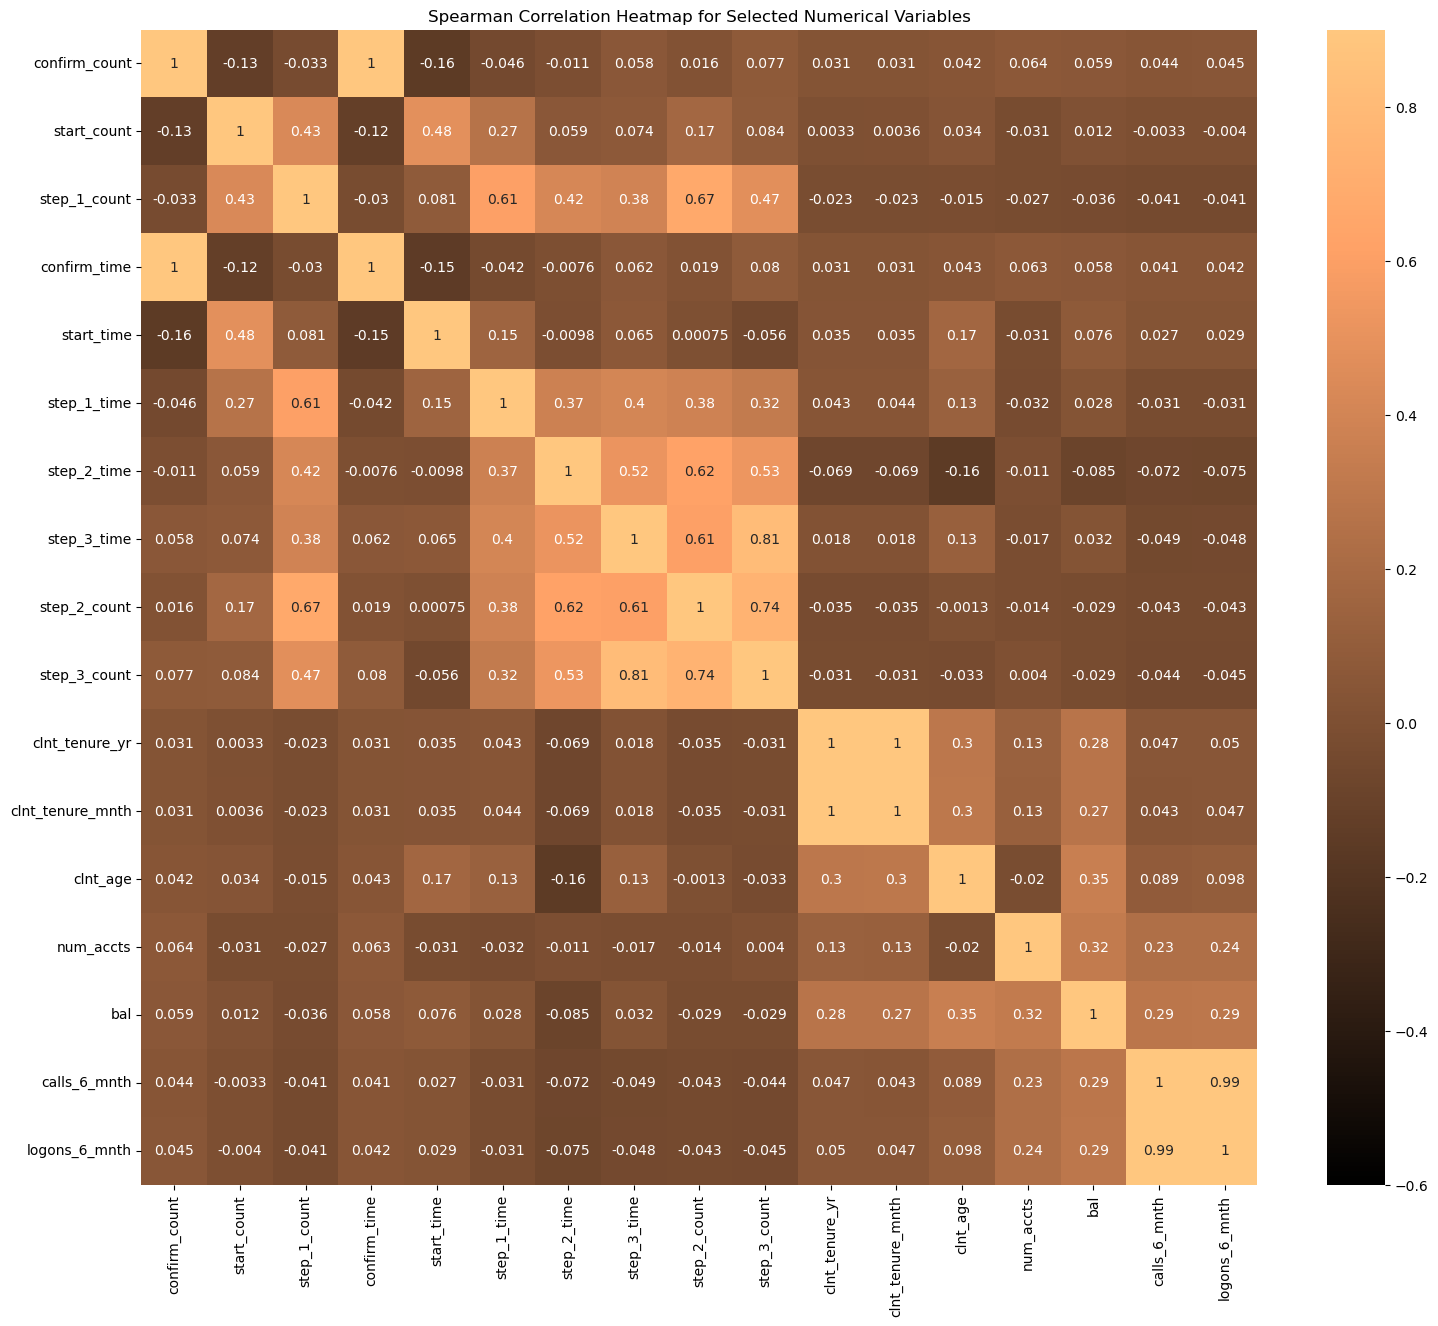

In [27]:
f.corr_map_spearman(df_test_num,-0.6,0.9)

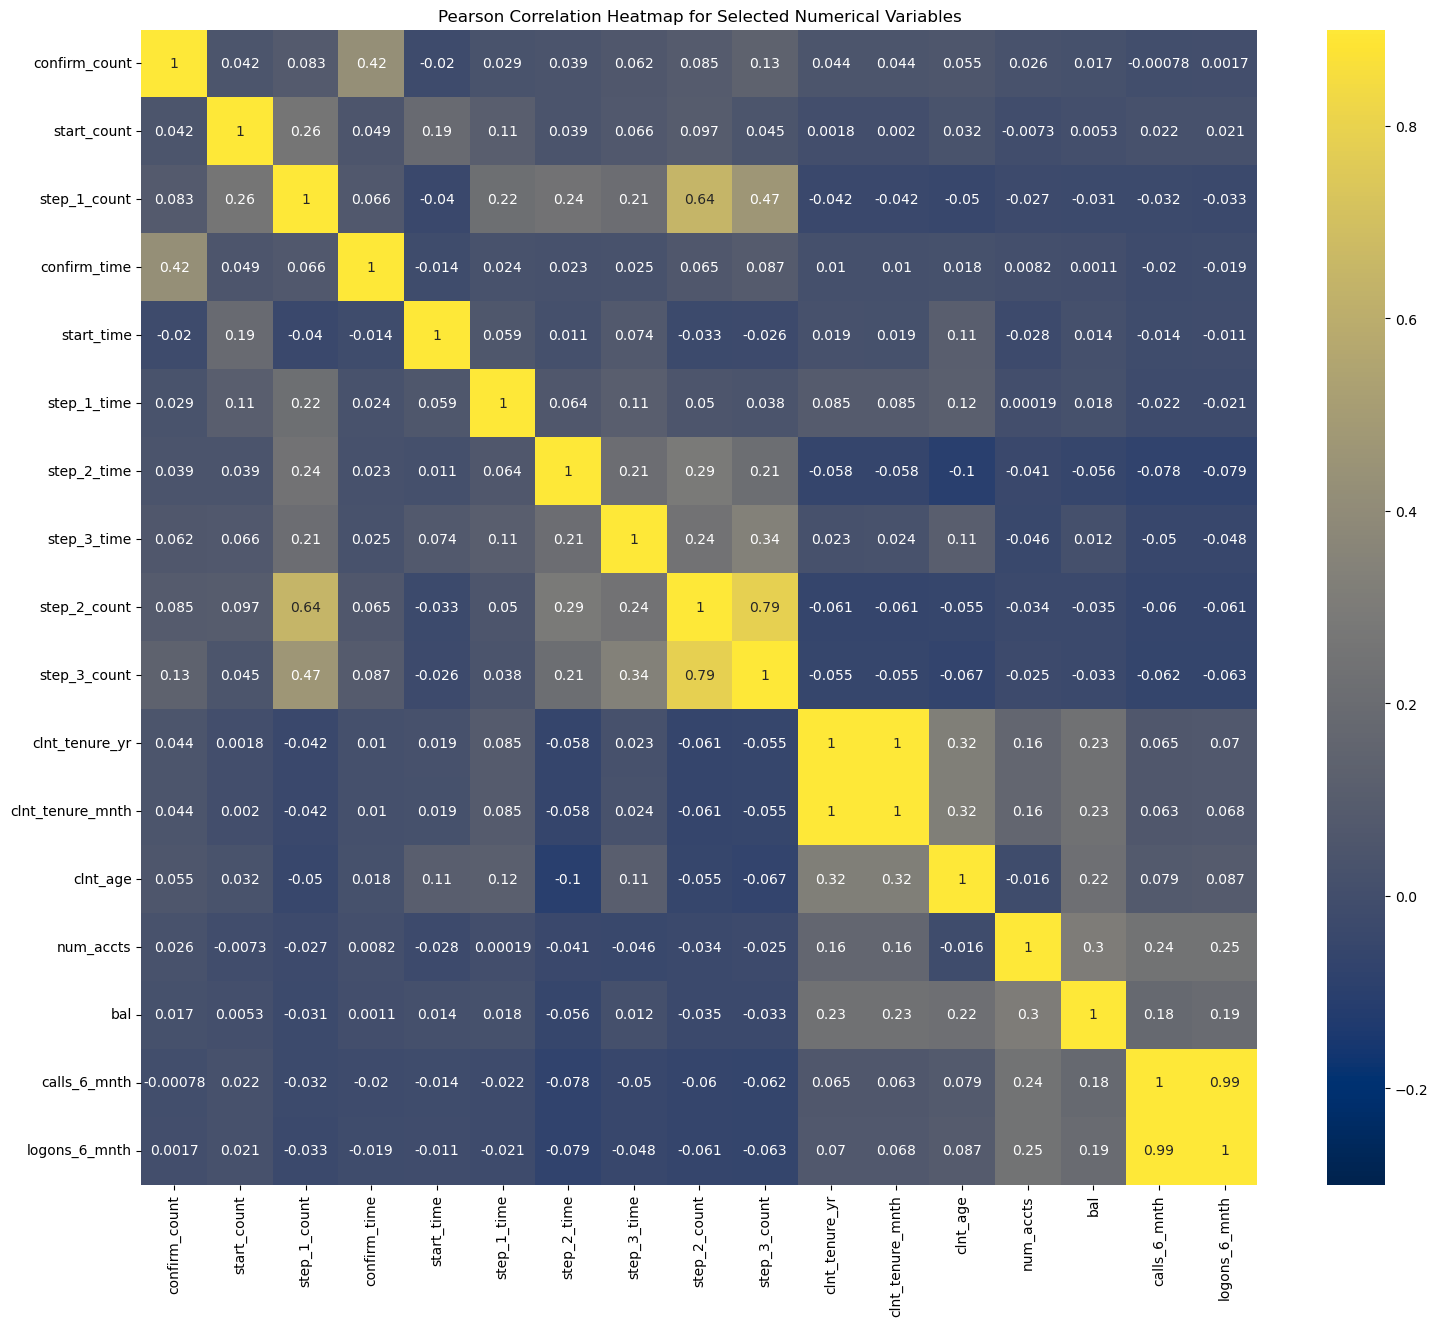

In [28]:
#MAPA DE CORRELACIÓN LINEAL ENTRE VARIABLES DE MUESTRA CONTROL
f.corr_map_pearson(df_control_num,-0.3,0.9)

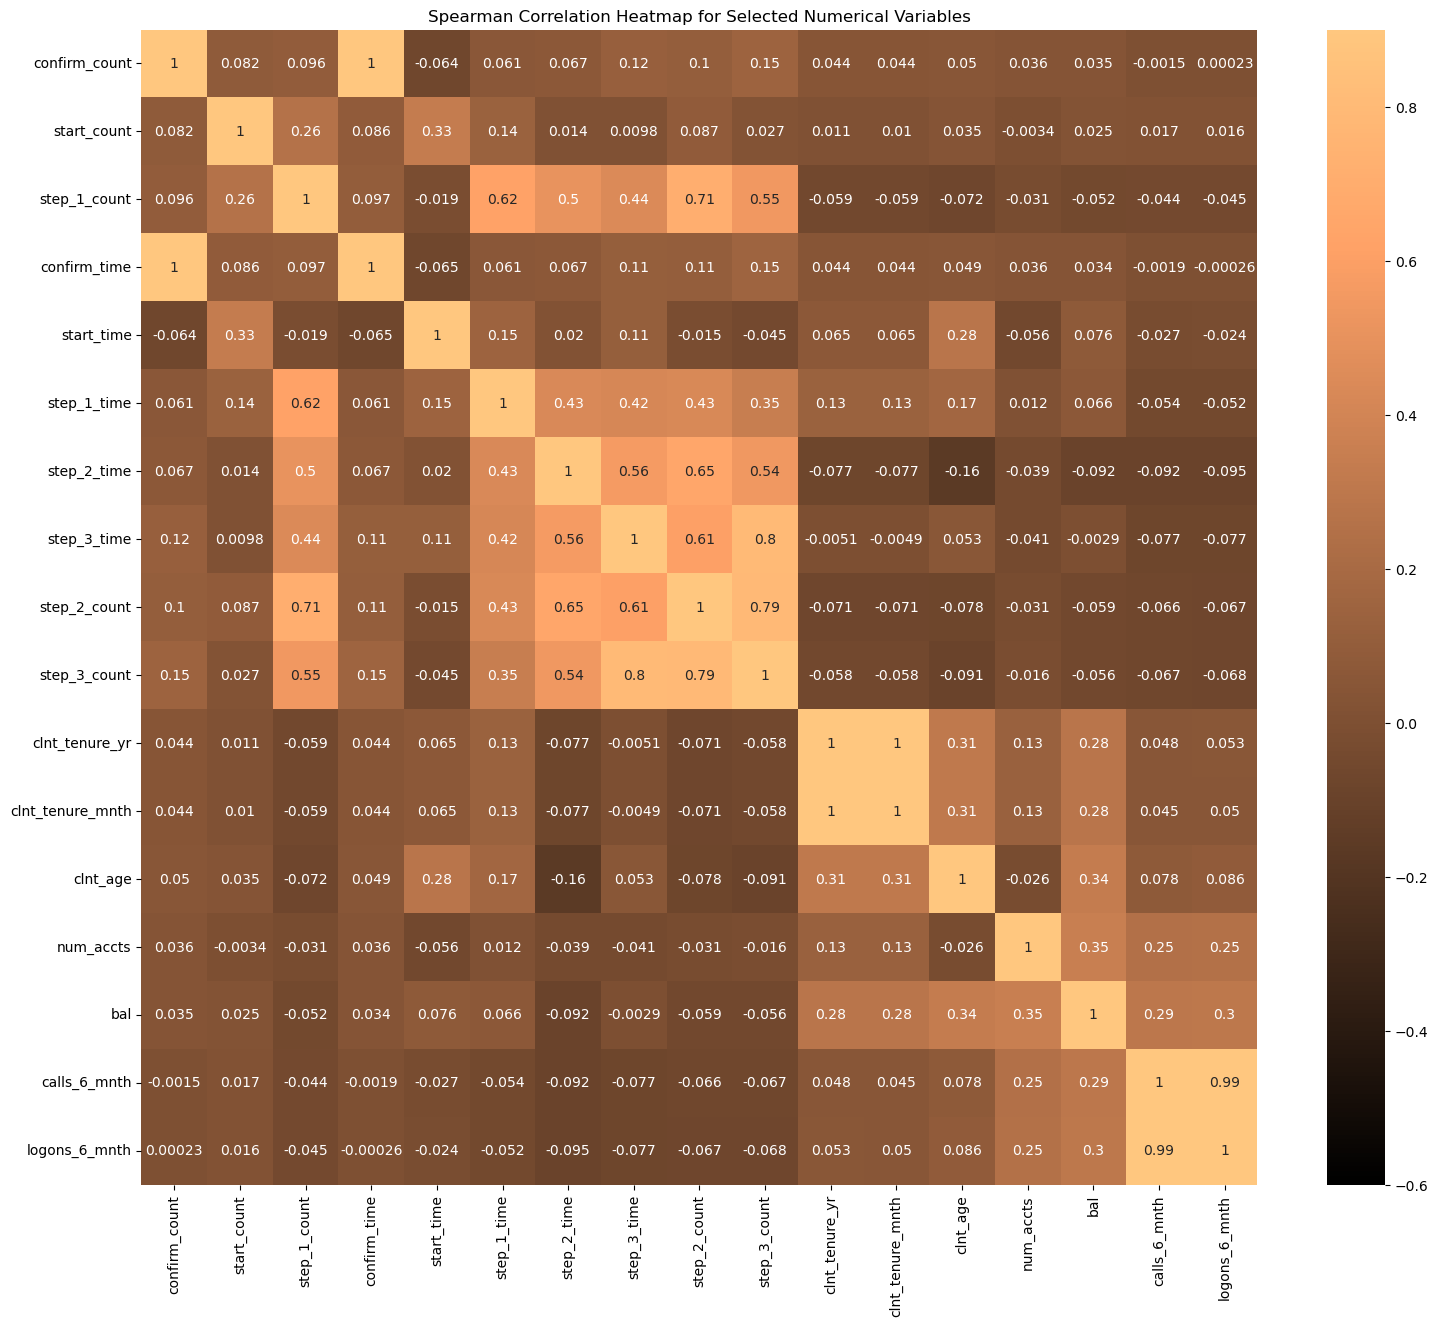

In [29]:
f.corr_map_spearman(df_control_num,-0.6,0.9)

De los valores de correlación de Pearson y Spearman entre las variables de la muestra TEST, se destaca:

Insights sobre las las características de los clientes:

clnt_age de los clientes, relacionada con: para test y control
- clnt_tenure_yr
- bal
- num_accts


num_accts
- bal 
- calls_6_mnth
- logons_6_mnth


bal 
- calls_6_mnth
- logons_6_mnth

### Análisis de comportamiento y correlación bi variable
A partir de lo observado en los mapas de correlación, se analizan a detalle las correlaciones más fuertes detectadas.

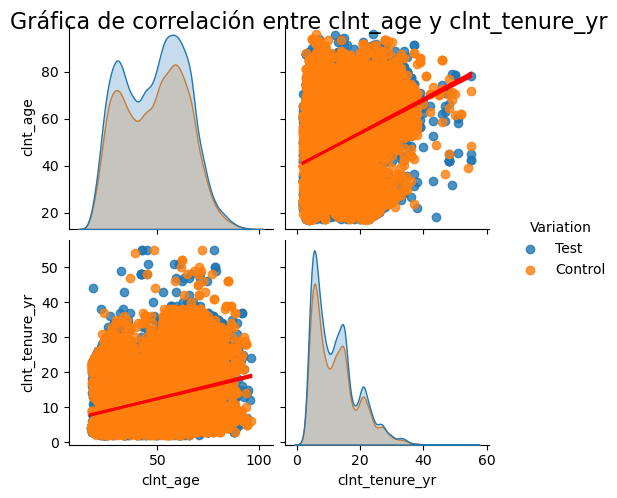

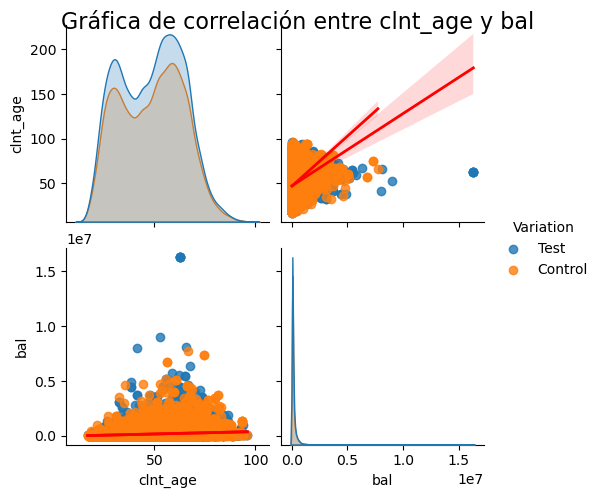

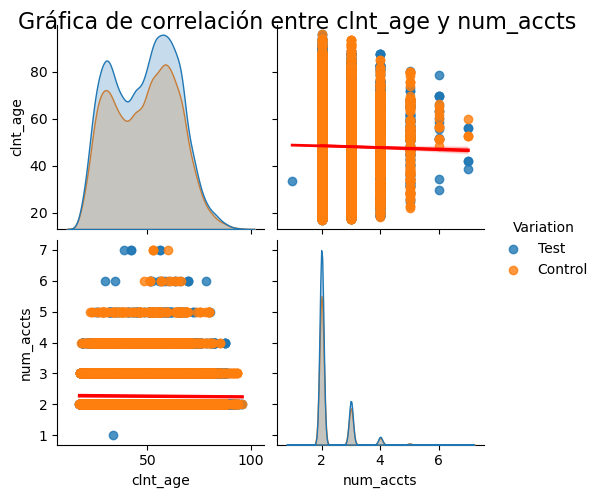

In [30]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE clnt_age 

f.pair_plots(df_final_completo,'clnt_age',['clnt_tenure_yr', 'bal', 'num_accts'],'Variation')

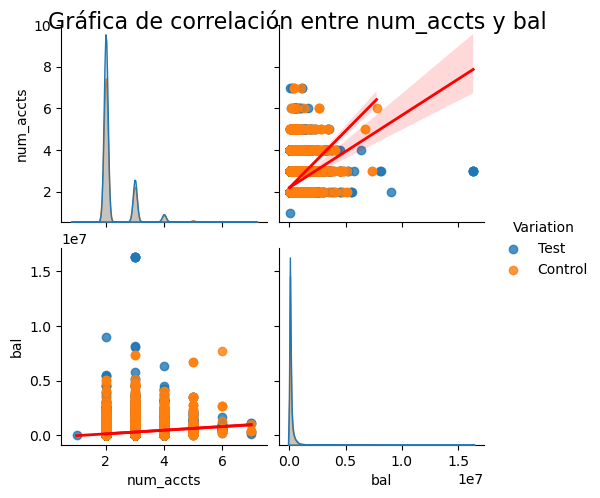

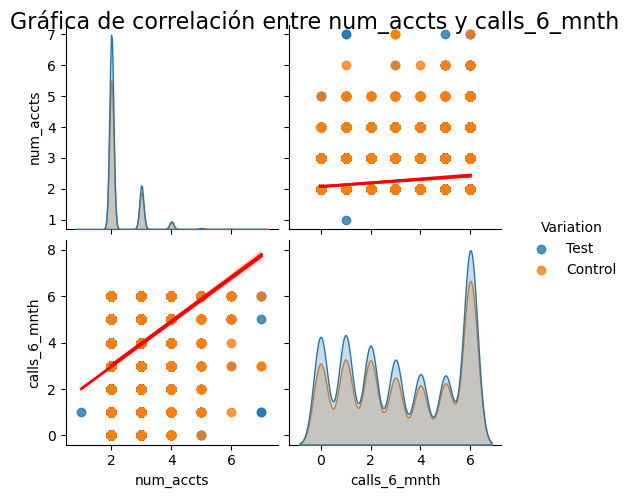

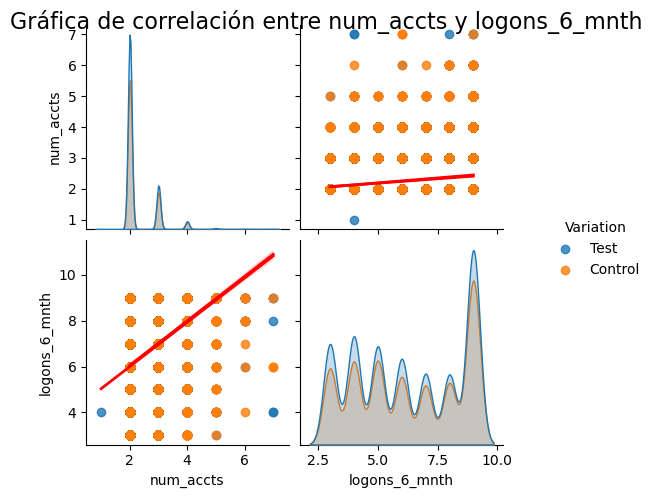

In [31]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE num_accts 

f.pair_plots(df_final_completo,'num_accts',['bal','calls_6_mnth', 'logons_6_mnth'],'Variation')

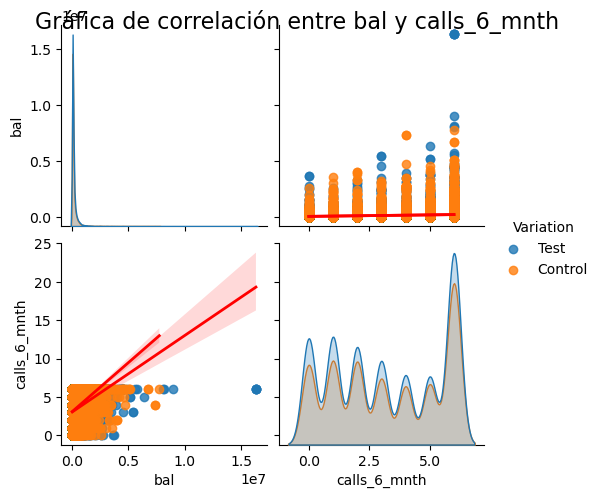

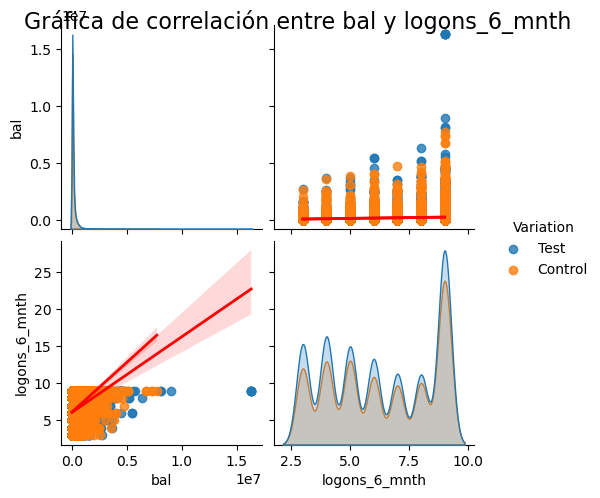

In [32]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE bal

f.pair_plots(df_final_completo,'bal',['calls_6_mnth', 'logons_6_mnth'],'Variation')

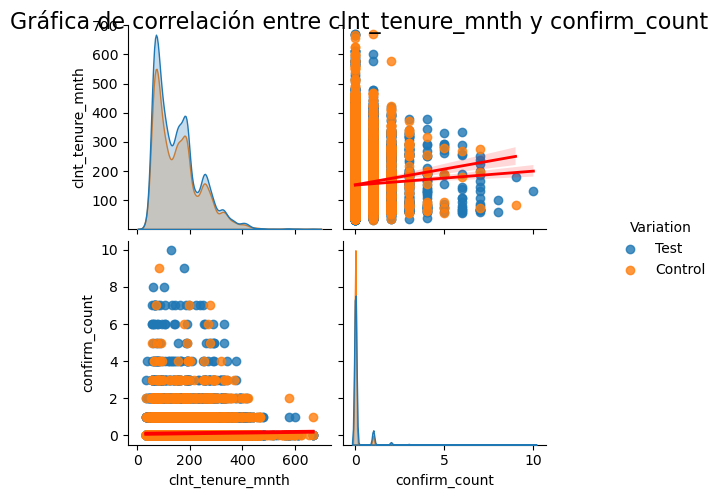

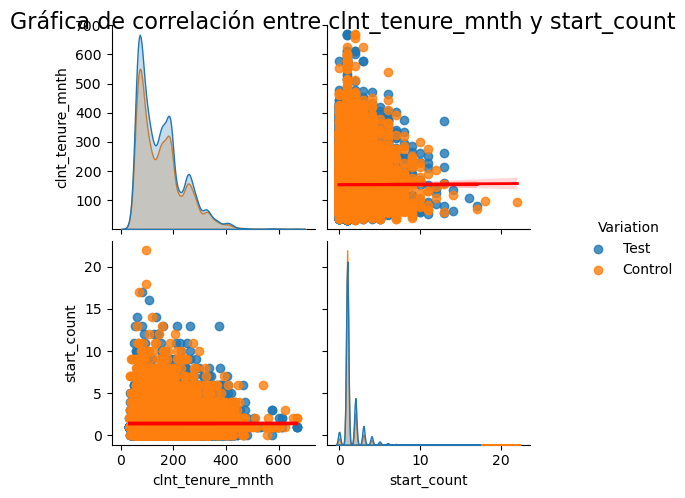

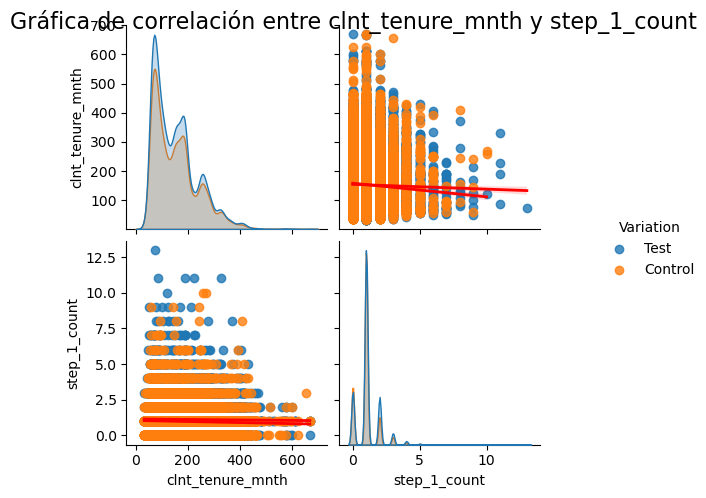

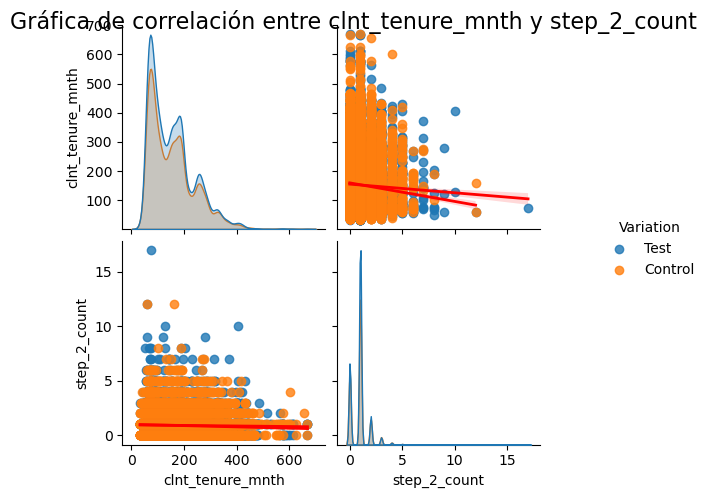

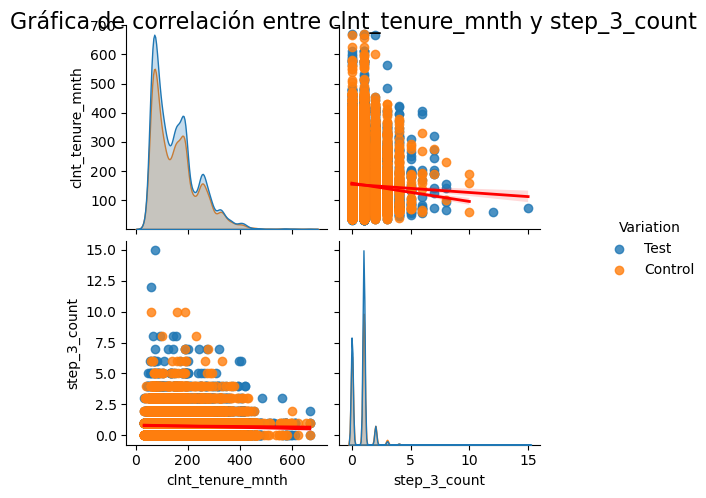

In [33]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE clnt_tenure_mnth y steps counts

f.pair_plots(df_final_completo,'clnt_tenure_mnth',['confirm_count', 'start_count', 'step_1_count','step_2_count', 'step_3_count'],'Variation')

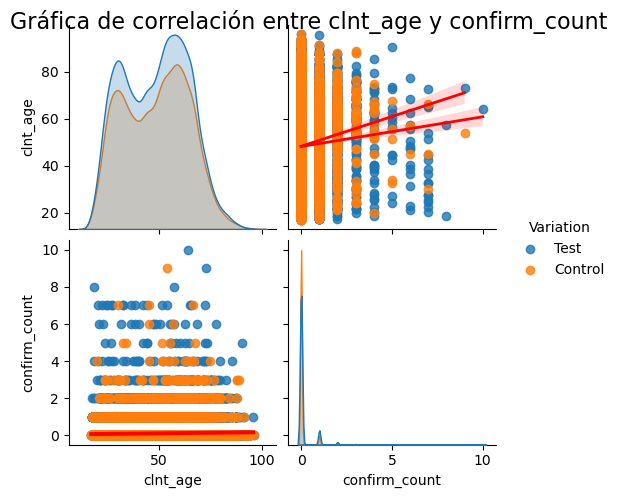

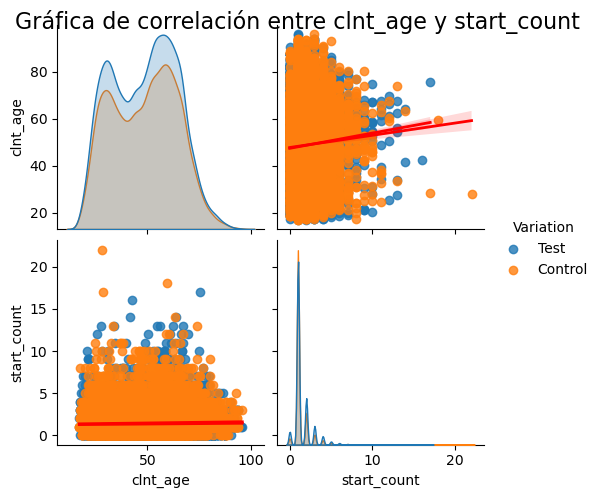

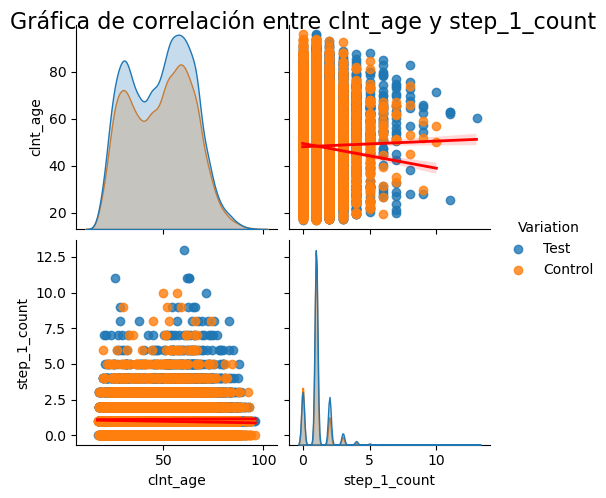

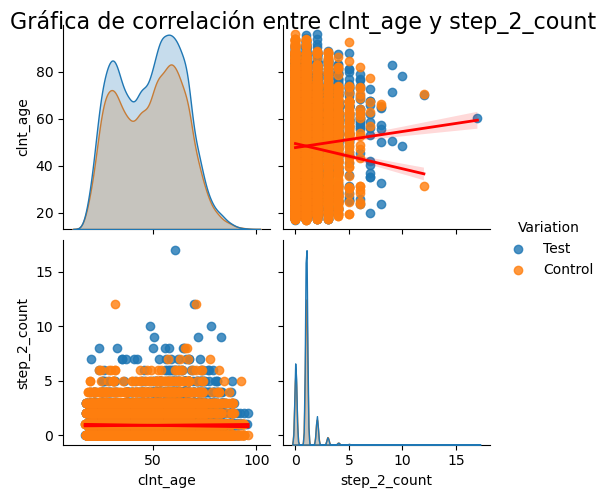

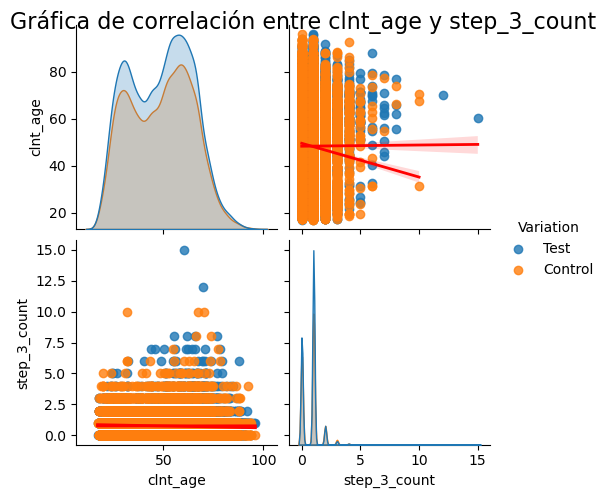

In [34]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE clnt_age y steps counts

f.pair_plots(df_final_completo,'clnt_age',['confirm_count', 'start_count', 'step_1_count','step_2_count', 'step_3_count'],'Variation')

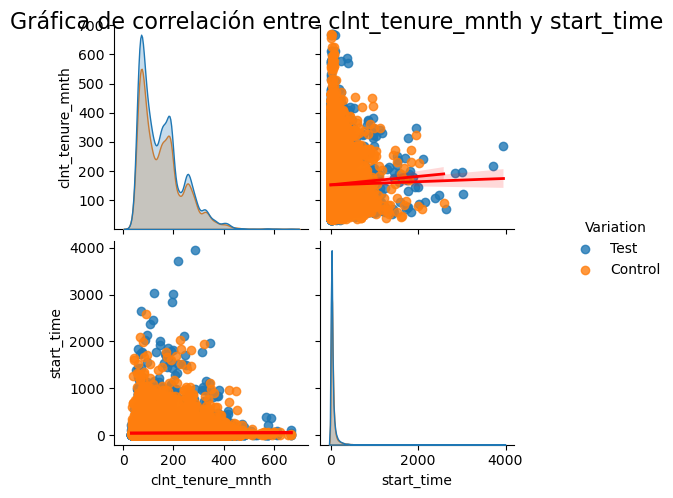

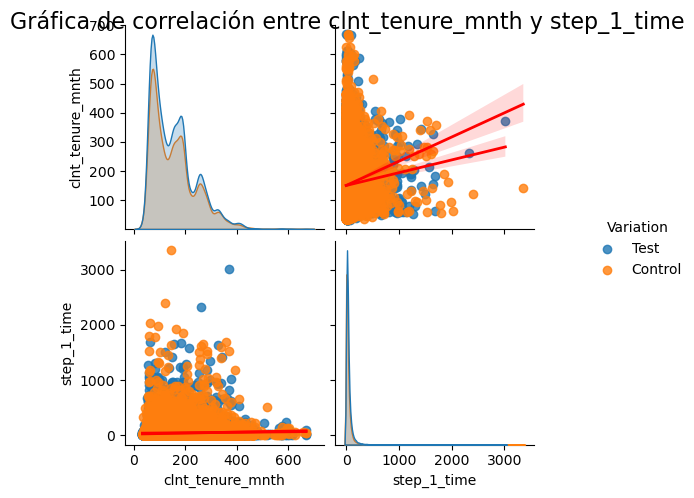

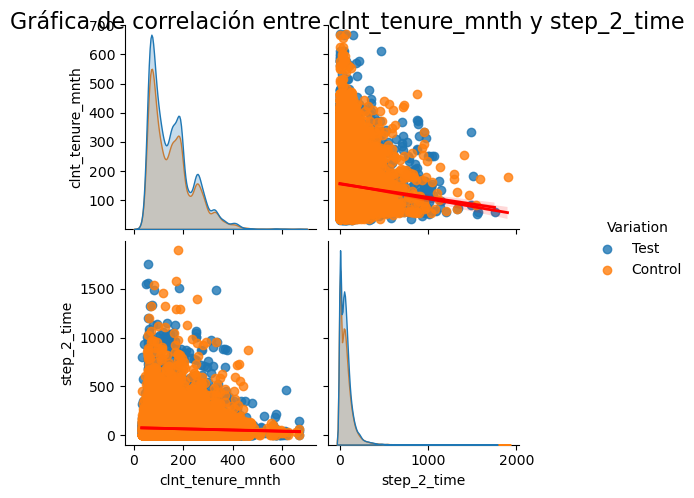

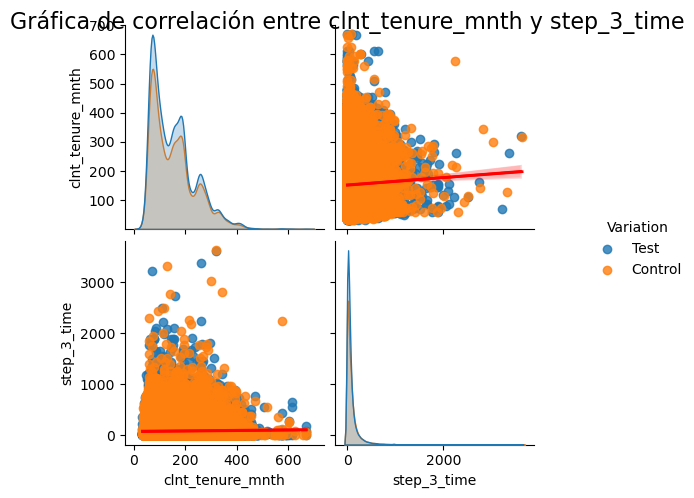

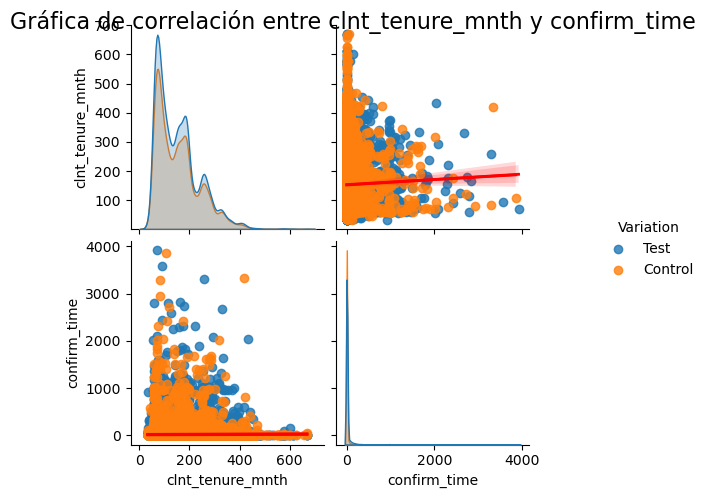

In [35]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE clnt_tenure_mnth y steps time

f.pair_plots(df_final_completo,'clnt_tenure_mnth',['start_time','step_1_time', 'step_2_time', 'step_3_time', 'confirm_time'],'Variation')

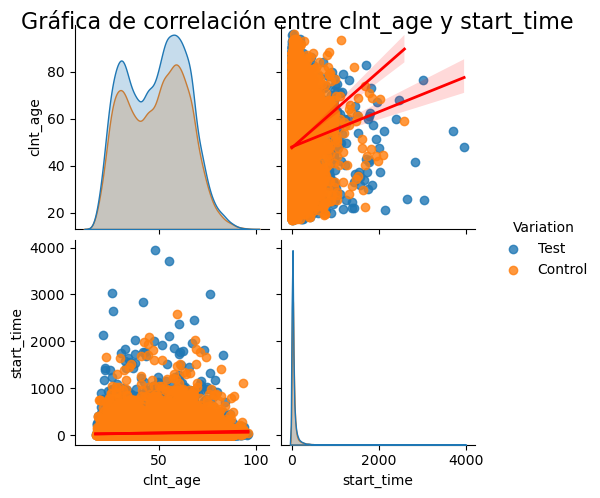

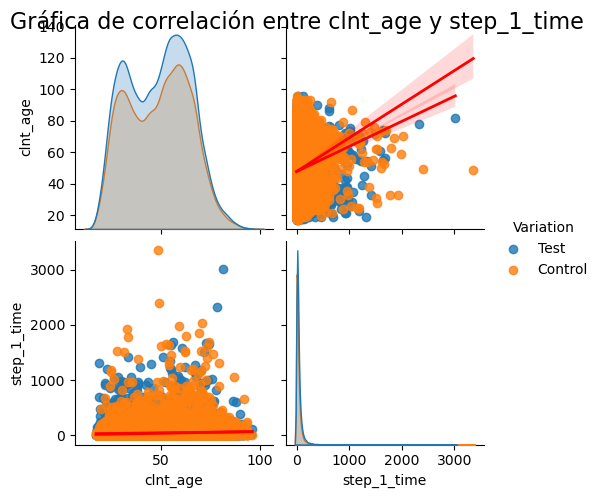

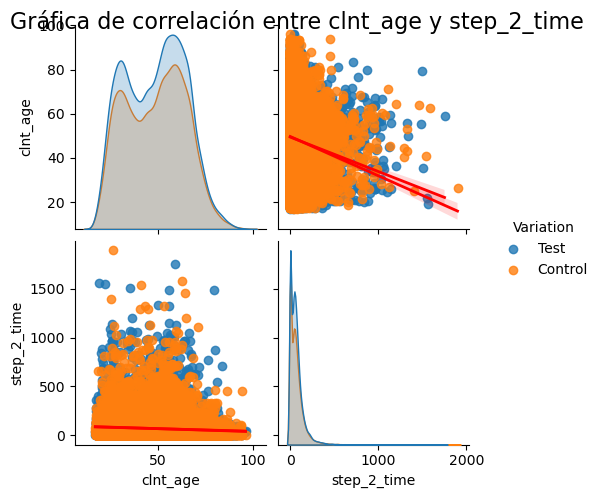

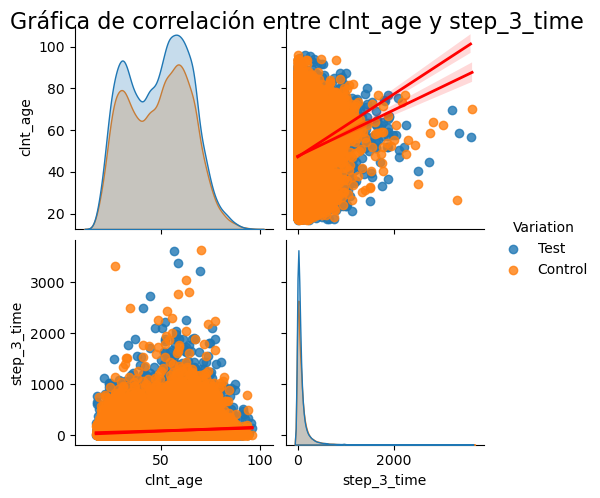

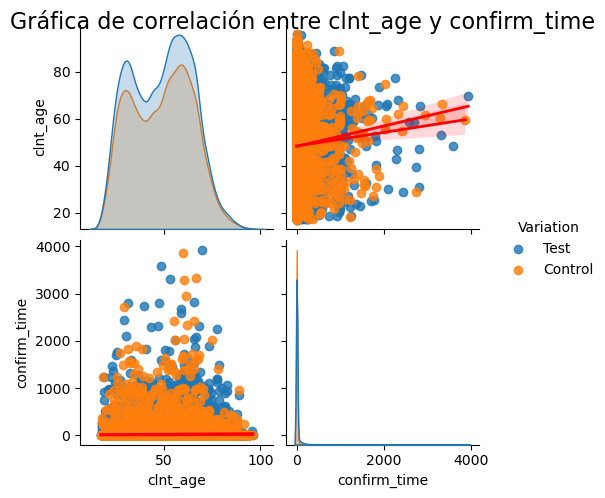

In [36]:
#GRÁFICOS PARA OBSERVAR CORRELACIONES ENTRE LA VARIABLE clnt_age y steps time

f.pair_plots(df_final_completo,'clnt_age',['start_time','step_1_time', 'step_2_time', 'step_3_time', 'confirm_time'],'Variation')

### Pruebas para determinar si las variables se distribuyen de forma normal (Kolmogorov - Smirnov)

#### Test variables:

The test results indicate that the distribution of confirm_count : P value = 0.0


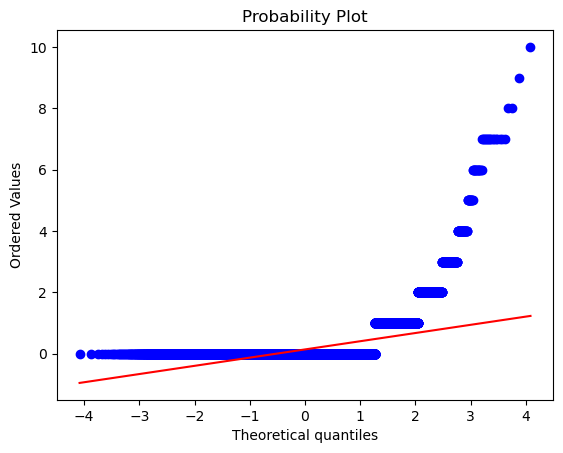

The test results indicate that the distribution of start_count : P value = 0.0


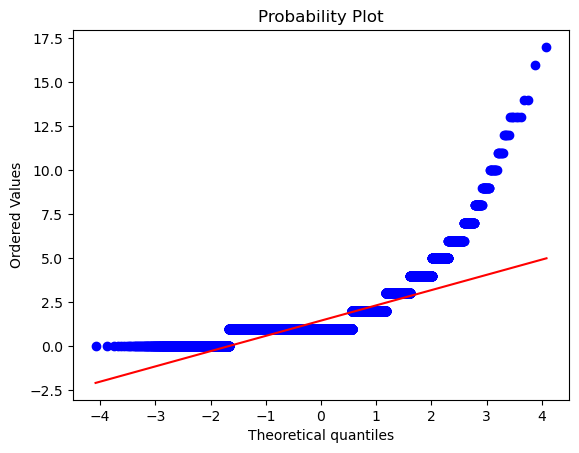

The test results indicate that the distribution of step_1_count : P value = 0.0


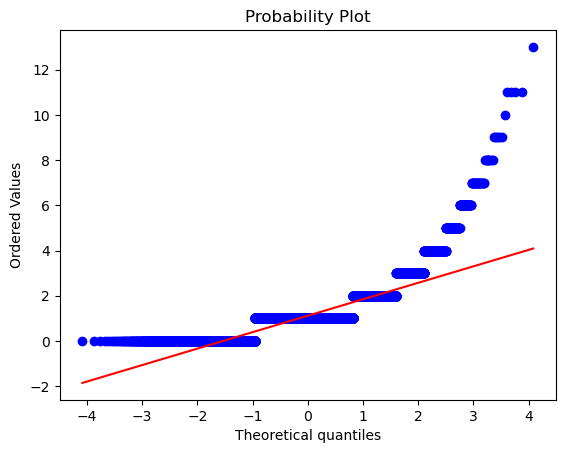

The test results indicate that the distribution of confirm_time : P value = 0.0


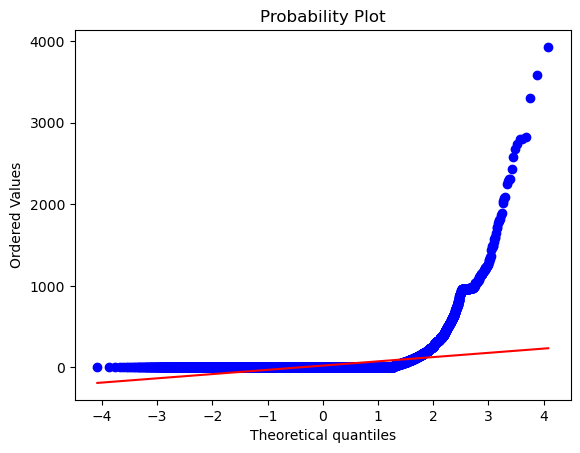

The test results indicate that the distribution of start_time : P value = 0.0


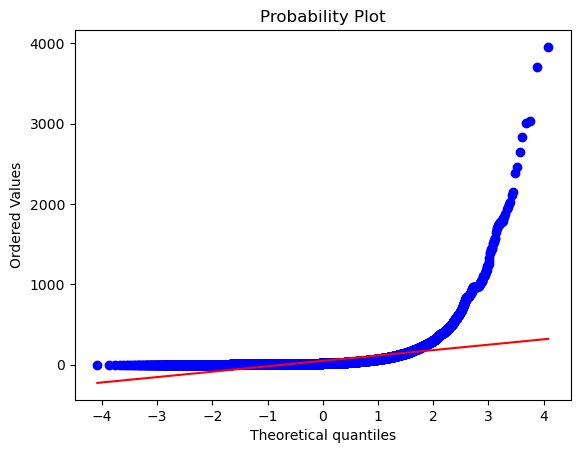

The test results indicate that the distribution of step_1_time : P value = 0.0


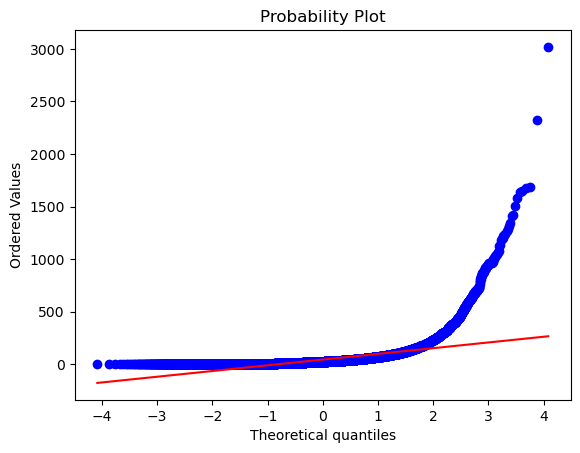

The test results indicate that the distribution of step_2_time : P value = 0.0


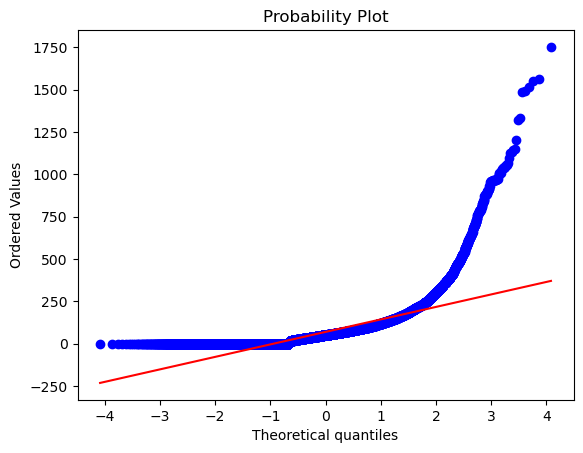

The test results indicate that the distribution of step_3_time : P value = 0.0


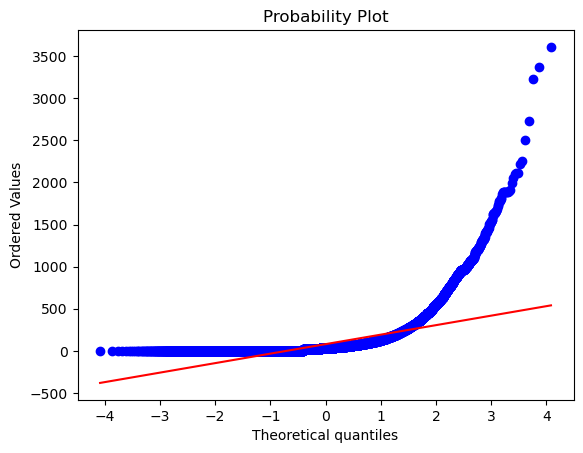

The test results indicate that the distribution of step_2_count : P value = 0.0


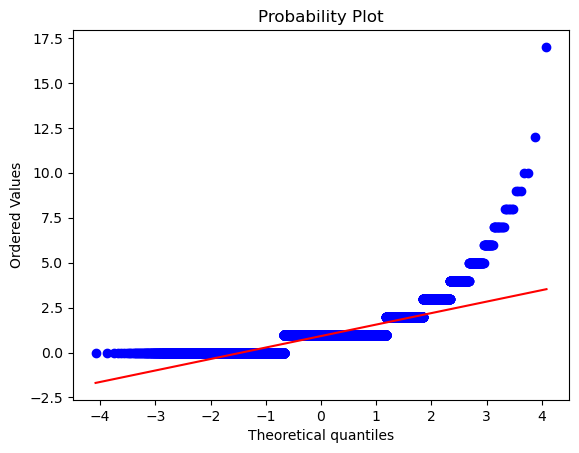

The test results indicate that the distribution of step_3_count : P value = 0.0


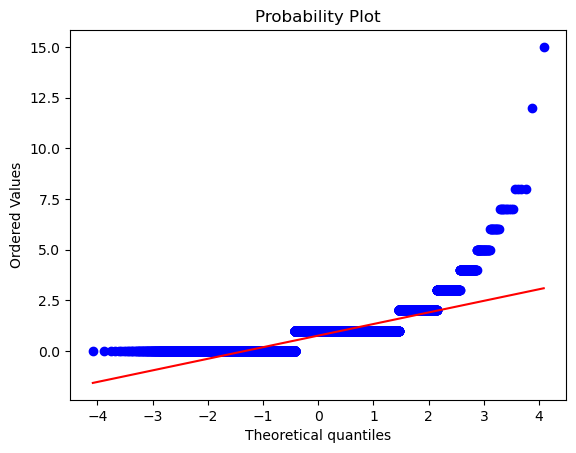

The test results indicate that the distribution of clnt_tenure_yr : P value = 0.0


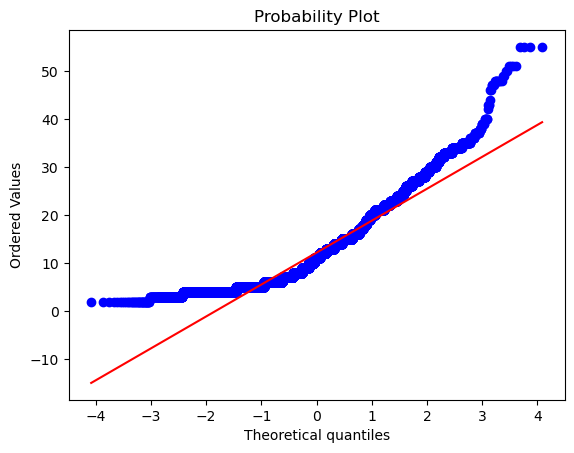

The test results indicate that the distribution of clnt_tenure_mnth : P value = 1.3604510438159392e-306


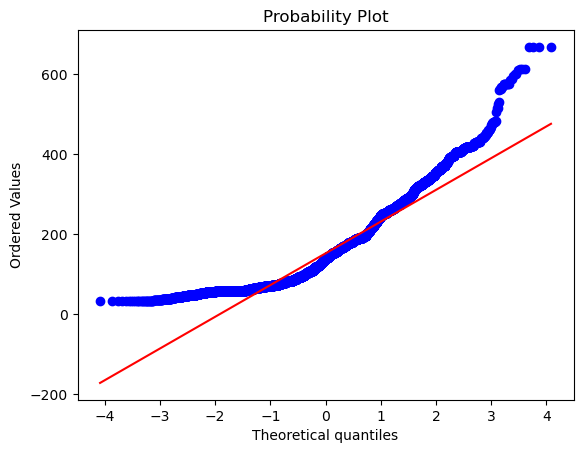

The test results indicate that the distribution of clnt_age : P value = 1.2653003810067917e-127


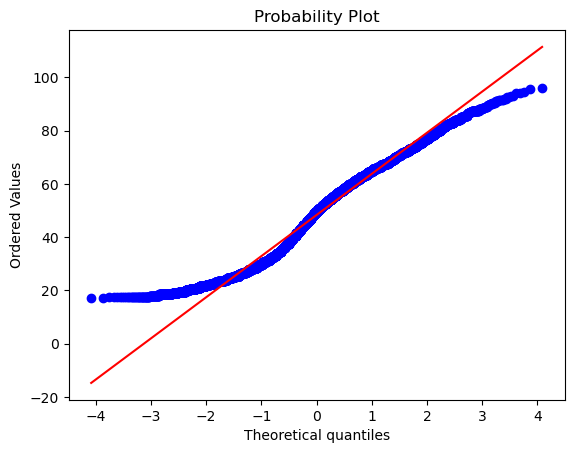

The test results indicate that the distribution of num_accts : P value = 0.0


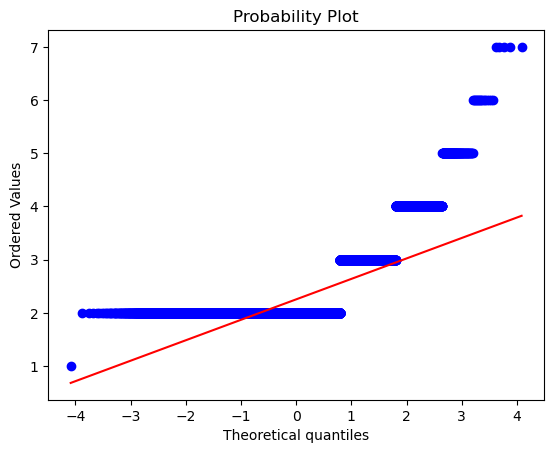

The test results indicate that the distribution of bal : P value = 0.0


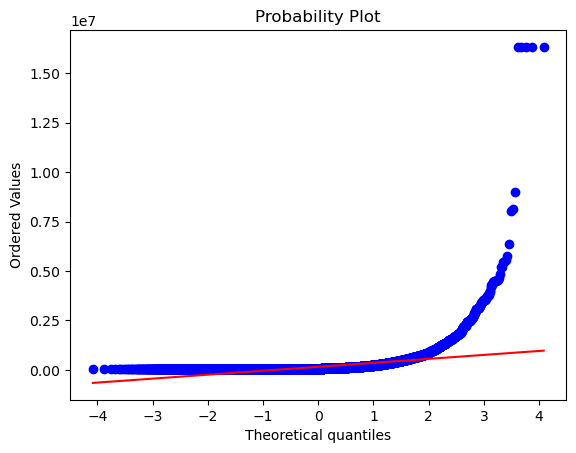

The test results indicate that the distribution of calls_6_mnth : P value = 0.0


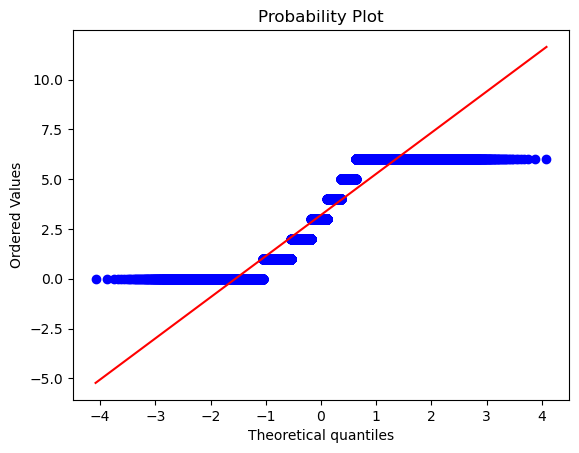

The test results indicate that the distribution of logons_6_mnth : P value = 0.0


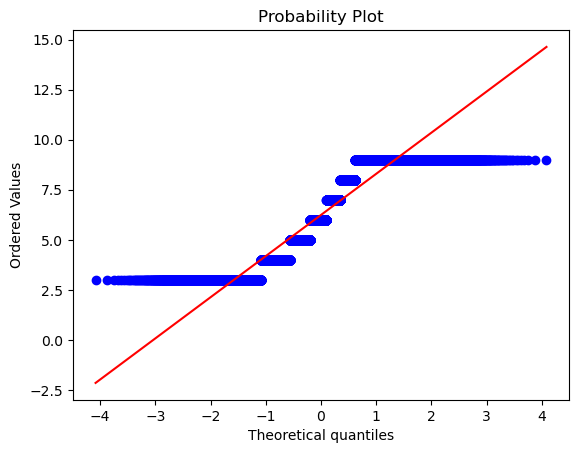

In [37]:
f.kolm_smir_test(df_test_num)
#Esta función calcula el puntaje z de cada una de los valores en las variables, para estandarizar los datos y poder aplicar
#el test de Kolmogorov. (Los datos estadarizados no se almacenan).

Una vez comprobado que todas las variables analizadas tienen una distribución de sus datos diferente a la normal, se procede a realizar la normalización de datos.

In [38]:
df_test_num_norm=f.max_min_norm(df_test_num)

The test results indicate that the distribution of confirm_count : P value = 0.0


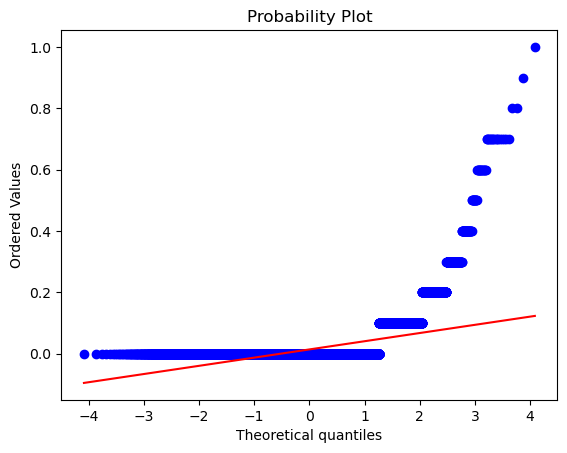

The test results indicate that the distribution of start_count : P value = 0.0


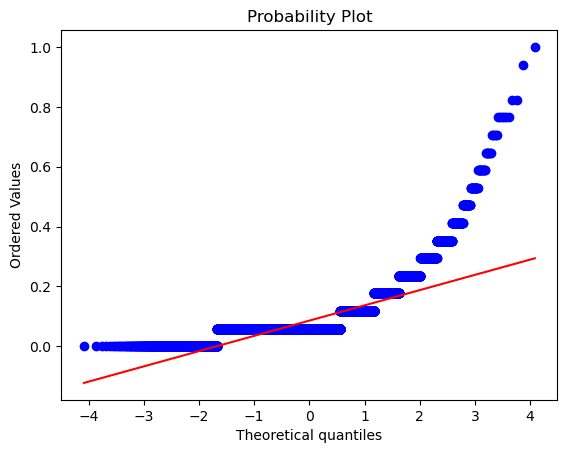

The test results indicate that the distribution of step_1_count : P value = 0.0


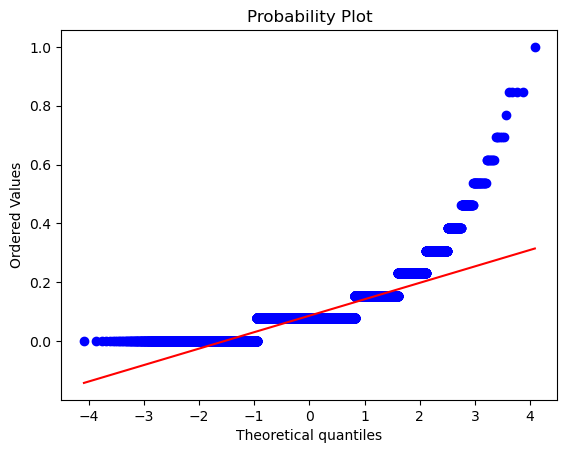

The test results indicate that the distribution of confirm_time : P value = 0.0


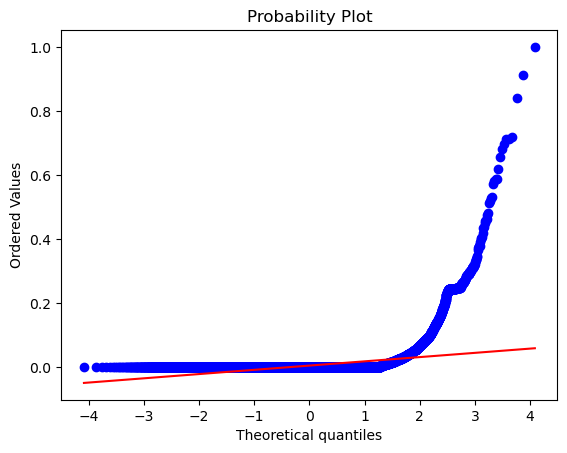

The test results indicate that the distribution of start_time : P value = 0.0


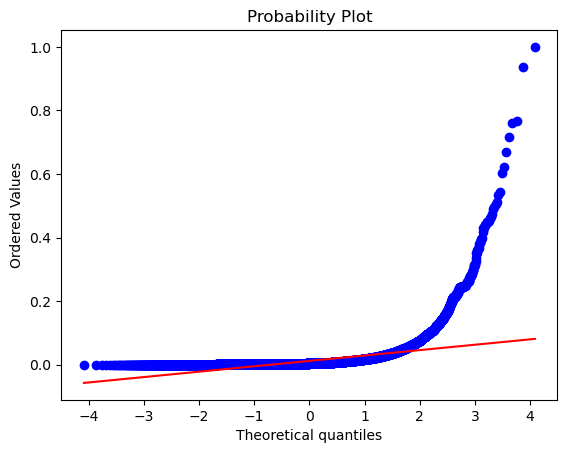

The test results indicate that the distribution of step_1_time : P value = 0.0


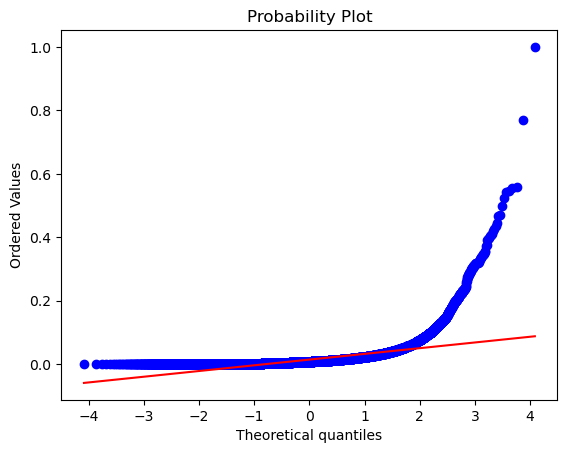

The test results indicate that the distribution of step_2_time : P value = 0.0


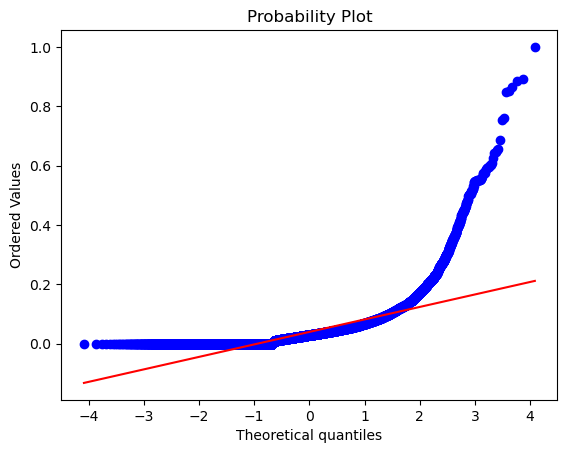

The test results indicate that the distribution of step_3_time : P value = 0.0


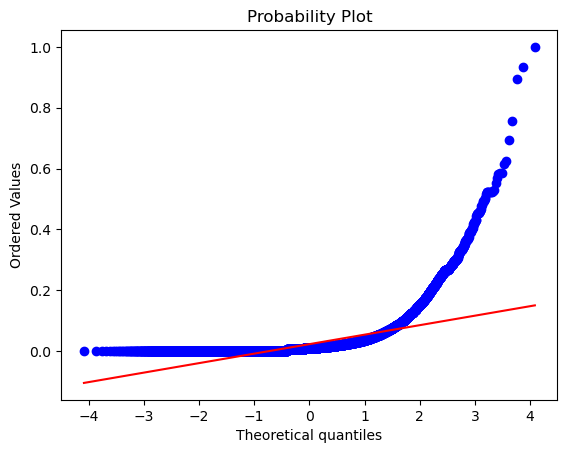

The test results indicate that the distribution of step_2_count : P value = 0.0


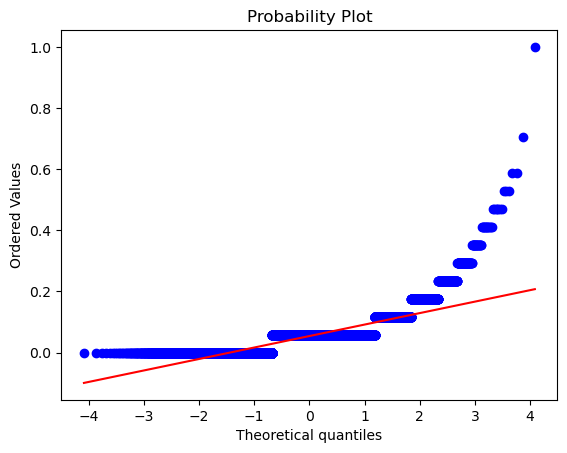

The test results indicate that the distribution of step_3_count : P value = 0.0


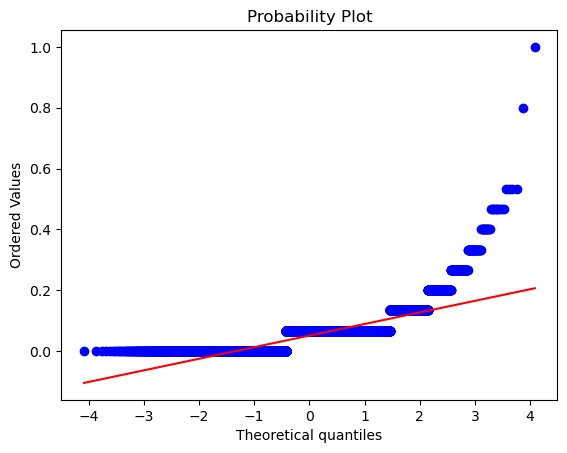

The test results indicate that the distribution of clnt_tenure_yr : P value = 0.0


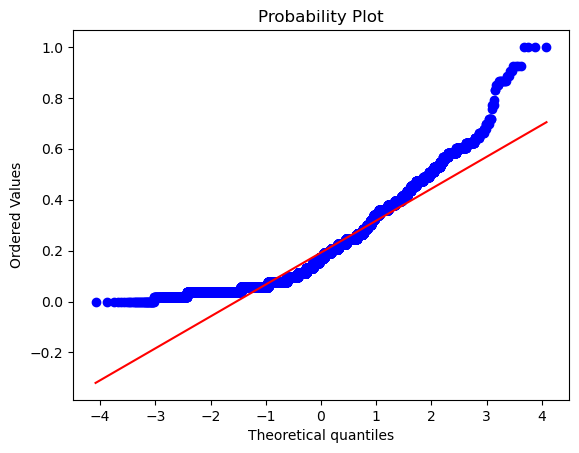

The test results indicate that the distribution of clnt_tenure_mnth : P value = 1.3604510437847388e-306


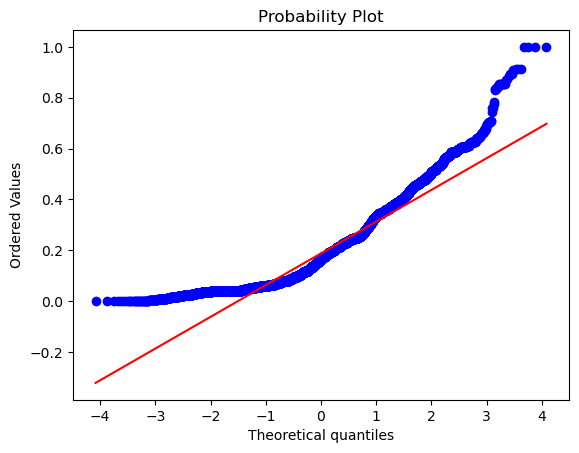

The test results indicate that the distribution of clnt_age : P value = 1.2653003810579636e-127


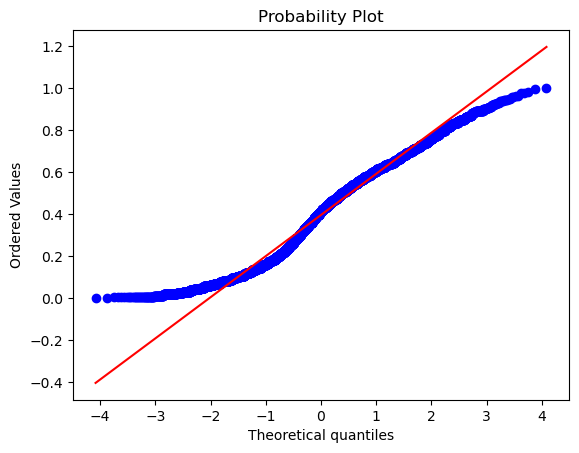

The test results indicate that the distribution of num_accts : P value = 0.0


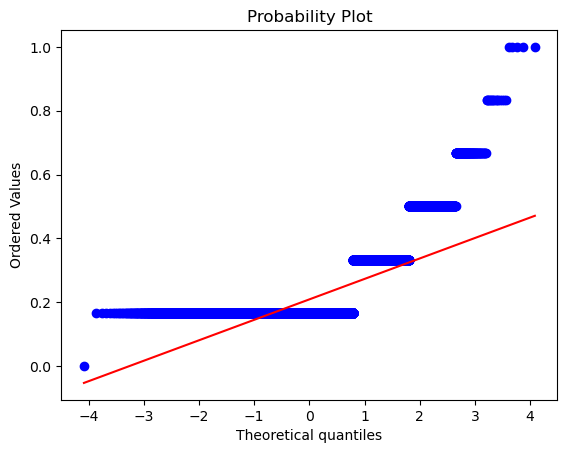

The test results indicate that the distribution of bal : P value = 0.0


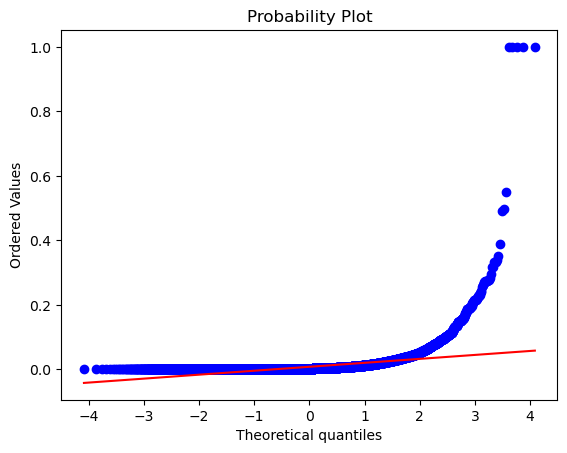

The test results indicate that the distribution of calls_6_mnth : P value = 0.0


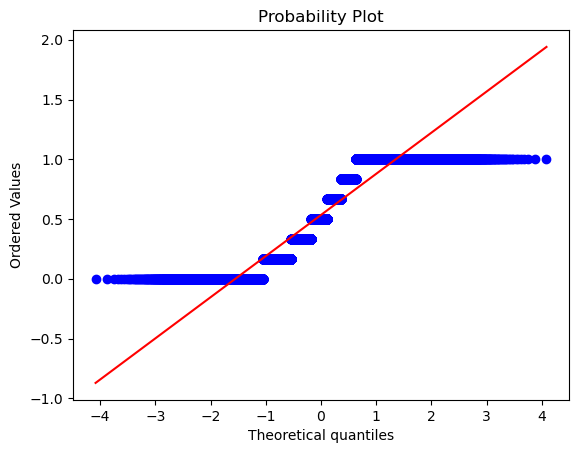

The test results indicate that the distribution of logons_6_mnth : P value = 0.0


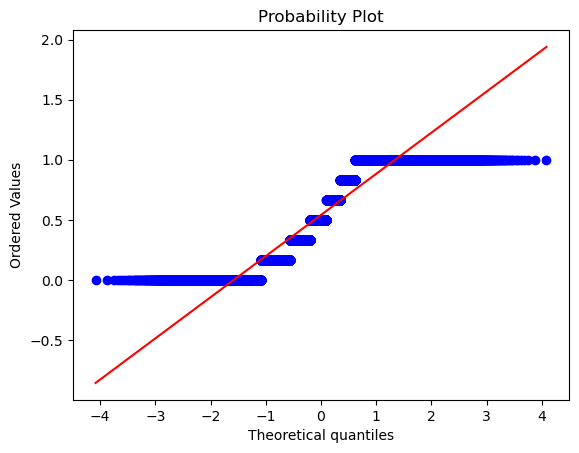

In [39]:
f.kolm_smir_test(df_test_num_norm)
#Se aplica nuevamente test de kolmogorov para visualizar resultados de la normalización de los datos.

### Control variables

The test results indicate that the distribution of confirm_count : P value = 0.0


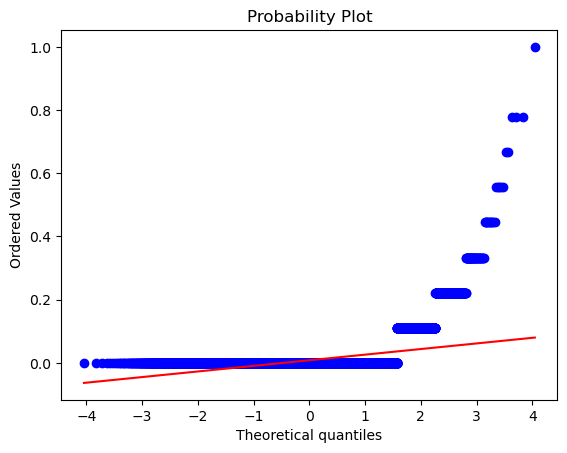

The test results indicate that the distribution of start_count : P value = 0.0


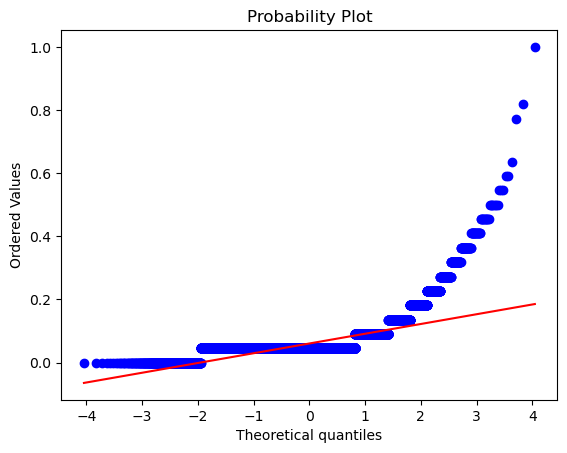

The test results indicate that the distribution of step_1_count : P value = 0.0


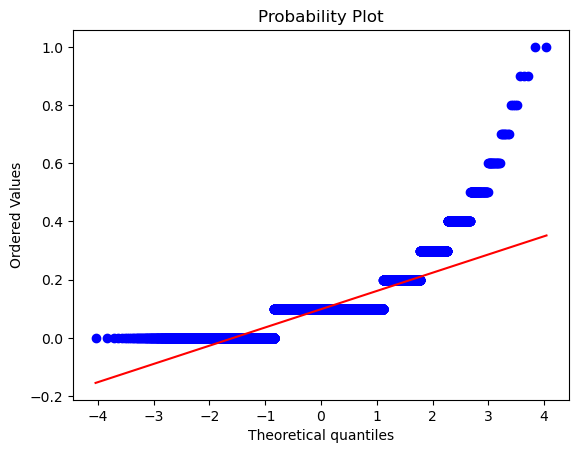

The test results indicate that the distribution of confirm_time : P value = 0.0


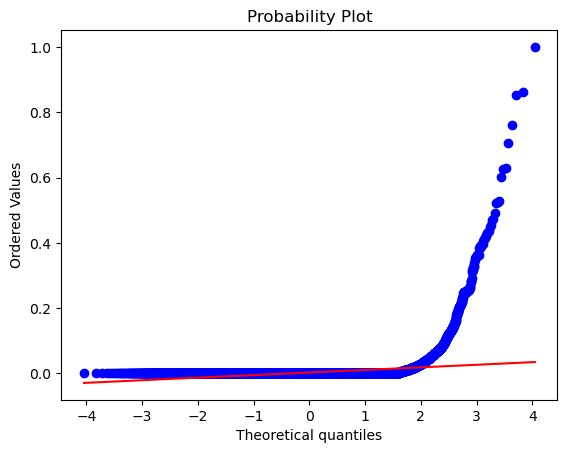

The test results indicate that the distribution of start_time : P value = 0.0


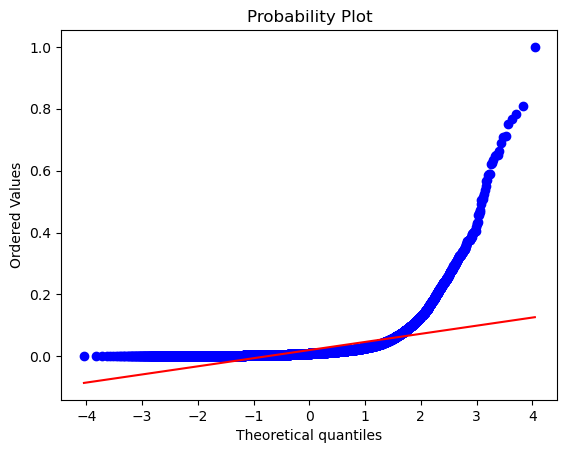

The test results indicate that the distribution of step_1_time : P value = 0.0


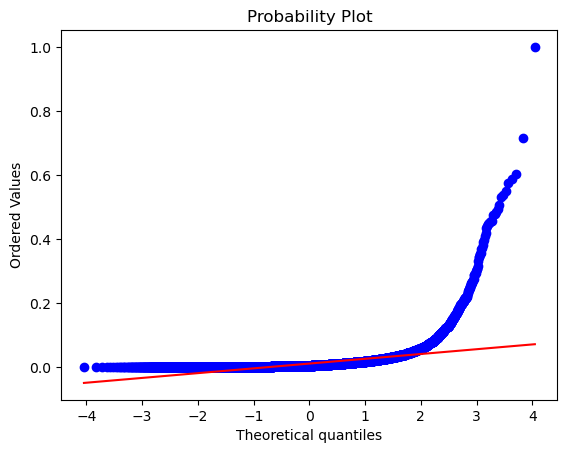

The test results indicate that the distribution of step_2_time : P value = 0.0


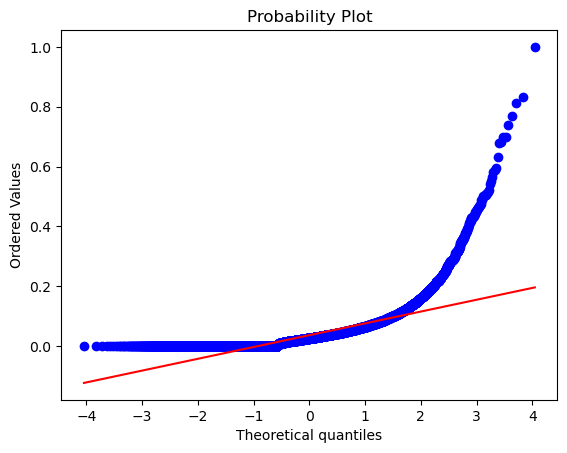

The test results indicate that the distribution of step_3_time : P value = 0.0


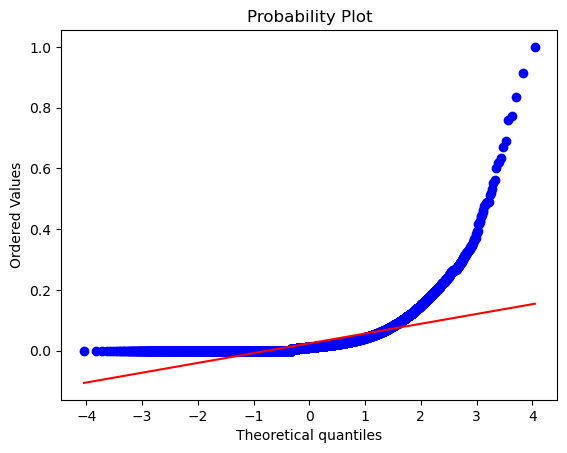

The test results indicate that the distribution of step_2_count : P value = 0.0


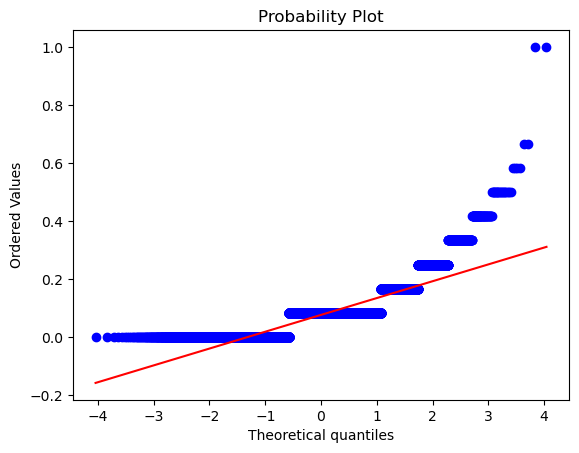

The test results indicate that the distribution of step_3_count : P value = 0.0


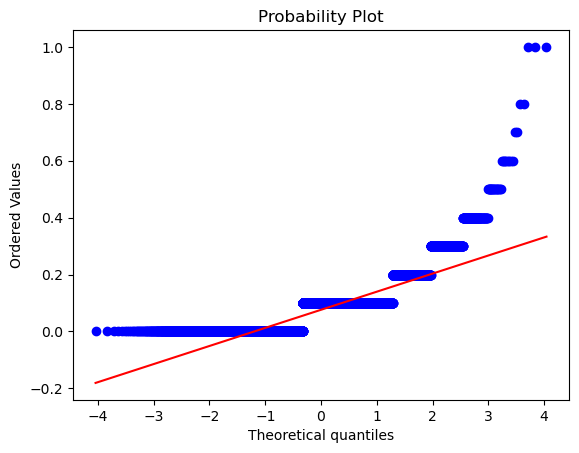

The test results indicate that the distribution of clnt_tenure_yr : P value = 0.0


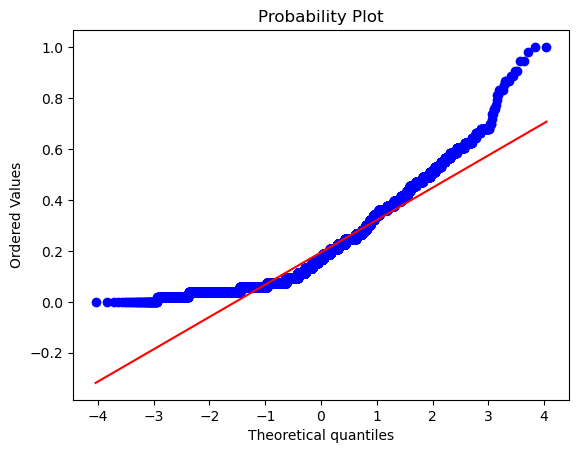

The test results indicate that the distribution of clnt_tenure_mnth : P value = 1.0383754647185358e-255


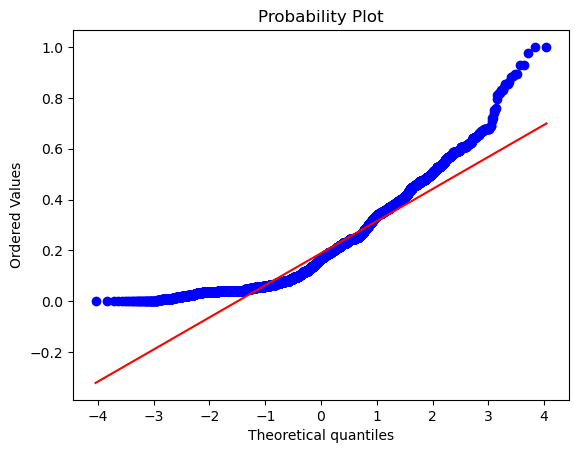

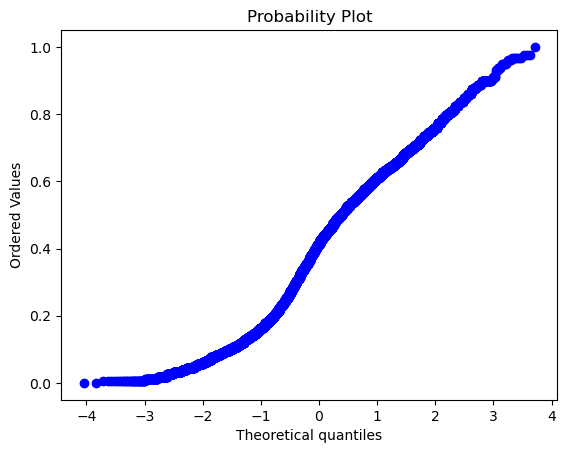

The test results indicate that the distribution of num_accts : P value = 0.0


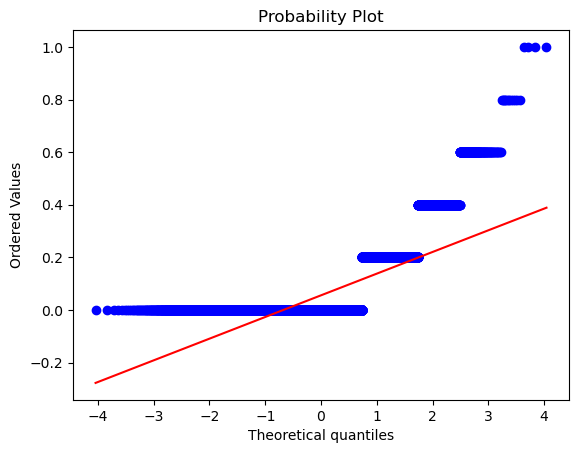

The test results indicate that the distribution of bal : P value = 0.0


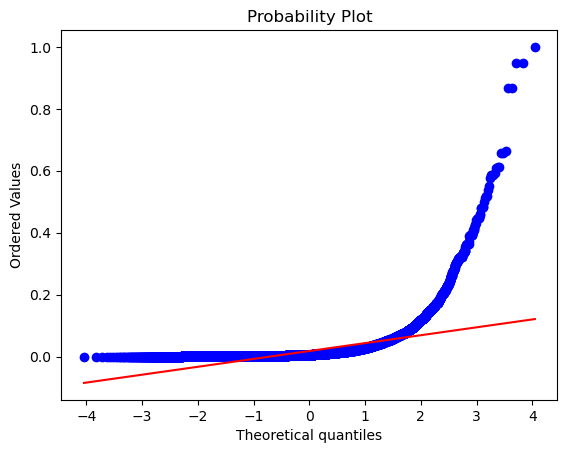

The test results indicate that the distribution of calls_6_mnth : P value = 0.0


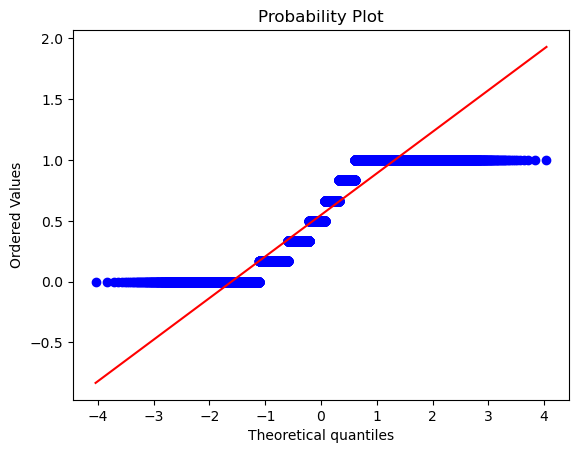

The test results indicate that the distribution of logons_6_mnth : P value = 0.0


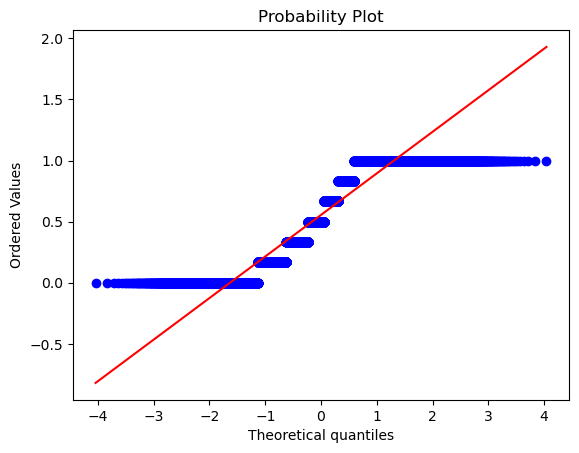

In [40]:
df_control_num_norm=f.max_min_norm(df_control_num)
f.kolm_smir_test(df_control_num_norm)
#Se aplica nuevamente test de kolmogorov para visualizar resultados de la normalización de los datos.

In [41]:
# Imputar con la media sin usar inplace para rellenar dos valores nulos en df_control_num_norm
df_test_num_norm["clnt_age"] = df_test_num_norm["clnt_age"].fillna(df_test_num_norm["clnt_age"].mean())
df_control_num_norm["clnt_age"] = df_control_num_norm["clnt_age"].fillna(df_control_num_norm["clnt_age"].mean())

#### A continuación, se plantean y efectuán pruebas de hipótesis sobre los datos disponibles

#### Edad de los clientes 
H0: El promedio de la edad de los clientes que usaron el nuevo sitio web es igual que el promedio de la edad de los clientes que usaron el previo sitio web.

H1: El promedio de la edad de los clientes que usaron el nuevo sitio web no es igual que el promedio de la edad de los clientes que usaron el previo sitio web.

In [42]:
f.t_test(df_test_num_norm,"clnt_age",df_control_num_norm,"clnt_age","two-sided")

P value = 0.44088509317440516 
No hay evidencia para rechazar la hipótesis nula


#### Antigüedad de los clientes 
H0: El promedio de los años en el banco de clientes que usaron el nuevo sitio web es igual que el promedio de los años en el banco de clientes que usaron el previo sitio web.

H1: El promedio de los años en el banco de clientes que usaron el nuevo sitio web no es igual que el promedio de los años en el banco de clientes que usaron el previo sitio web.

In [43]:
f.t_test(df_test_num_norm,"clnt_tenure_yr",df_control_num_norm,"clnt_tenure_yr","two-sided")

P value = 0.08052590185167417 
No hay evidencia para rechazar la hipótesis nula


### Pruebas de hipótesis a los resultados de la prueba de los sitios web


#### Tasa de éxito en nuevo sitio web vs antiguo sitio web, para el Step 1

H0: La tasa de éxito media por cliente en el Paso 1 del sitio web nuevo es menor o igual que en el antiguo. 

H1: La tasa de éxito media por cliente en el Paso 1, es mayor en el nuevo sitio web que en el antiguo.

In [45]:
df_tasas= pd.read_csv(r"Data\cleaned\tasas.csv")

In [46]:
#Se crean dos dataframe temporales para agrupar los datos que se desean comparar
df1=df_tasas.loc[df_tasas["Variation"]=="Test"]
df2=df_tasas.loc[df_tasas["Variation"]=="Control"]

f.t_test(df1,"step_1_rate",df2,"step_1_rate","greater")

P value = 0.9957983146679769 
No hay evidencia para rechazar la hipótesis nula


#### Tasa de éxito en nuevo sitio web vs antiguo sitio web, para el Step 2

H0: La tasa de éxito media por cliente en el Paso 2 del sitio web nuevo es menor o igual que en el antiguo. 

H1: La tasa de éxito media por cliente en el Paso 2, es mayor en el nuevo sitio web que en el antiguo.

In [47]:
#Se crean dos dataframe temporales para agrupar los datos que se desean comparar
df1=df_tasas.loc[df_tasas["Variation"]=="Test"]
df2=df_tasas.loc[df_tasas["Variation"]=="Control"]

f.t_test(df1,"step_2_rate",df2,"step_2_rate","greater")

P value = 4.425716833054565e-34 
Hay evidencia para rechazar la hipótesis nula


#### Tasa de éxito en nuevo sitio web vs antiguo sitio web, para el Step 3

H0: La tasa de éxito media por cliente en el Paso 3 del sitio web nuevo es menor o igual que en el antiguo. 

H1: La tasa de éxito media por cliente en el Paso 3, es mayor en el nuevo sitio web que en el antiguo.


In [48]:
#Se crean dos dataframe temporales para agrupar los datos que se desean comparar
df1=df_tasas.loc[df_tasas["Variation"]=="Test"]
df2=df_tasas.loc[df_tasas["Variation"]=="Control"]

f.t_test(df1,"step_3_rate",df2,"step_3_rate","greater")

P value = 5.774047730992527e-36 
Hay evidencia para rechazar la hipótesis nula


#### Tasa de fallo para completar el proceso en nuevo sitio web vs antiguo sitio web.

0: En promedio, la tasa de de fallo al completar el proceso en el nuevo sitio es mayor o igual que en el antiguo. 

H1: En promedio, la tasa de de fallo al completar el proceso en el nuevo sitio es menor que en el antiguo.

In [49]:
#Se crean dos dataframe temporales para agrupar los datos que se desean comparar
df1=df_tasas.loc[df_tasas["Variation"]=="Test"]
df2=df_tasas.loc[df_tasas["Variation"]=="Control"]

f.t_test(df1,"failure_rate",df2,"failure_rate","less")

P value = 1.5697773125539577e-90 
Hay evidencia para rechazar la hipótesis nula
